In [604]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from sklearn.linear_model import LinearRegression

In [605]:
data = pd.read_csv('BAC.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,46.660000,46.950001,46.180000,46.459999,30.944794,10238100
1,2005-01-04,46.410000,46.730000,45.740002,45.820000,30.518513,10264100
2,2005-01-05,45.639999,45.939999,45.250000,45.290001,30.165506,14796100
3,2005-01-06,45.419998,45.630001,44.990002,45.220001,30.118887,14602200
4,2005-01-07,45.299999,45.360001,44.720001,44.730000,29.792515,10547200
...,...,...,...,...,...,...,...
4526,2022-12-23,32.400002,32.580002,32.189999,32.470001,32.005371,21378600
4527,2022-12-27,32.500000,32.669998,32.279999,32.529999,32.064510,22776100
4528,2022-12-28,32.570000,32.970001,32.529999,32.770000,32.301079,30541000
4529,2022-12-29,32.889999,33.160000,32.750000,33.139999,32.665783,22252900


In [606]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4.531000e+03
mean,26.128713,26.420113,25.813975,26.109839,21.707382,1.010425e+08
std,13.749759,13.832501,13.664766,13.749975,10.819741,1.050944e+08
min,3.220000,3.510000,2.530000,3.140000,2.591577,4.520100e+06
25%,14.740000,14.910000,14.530000,14.730000,12.380632,4.126650e+07
50%,23.920000,24.230000,23.620001,23.920000,21.237963,6.870870e+07
75%,37.080000,37.645000,36.519998,37.070000,30.784658,1.239726e+08
max,55.040001,55.080002,54.820000,54.900002,47.565868,1.226791e+09


In [607]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4531 entries, 0 to 4530
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4531 non-null   object 
 1   Open       4531 non-null   float64
 2   High       4531 non-null   float64
 3   Low        4531 non-null   float64
 4   Close      4531 non-null   float64
 5   Adj Close  4531 non-null   float64
 6   Volume     4531 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 247.9+ KB


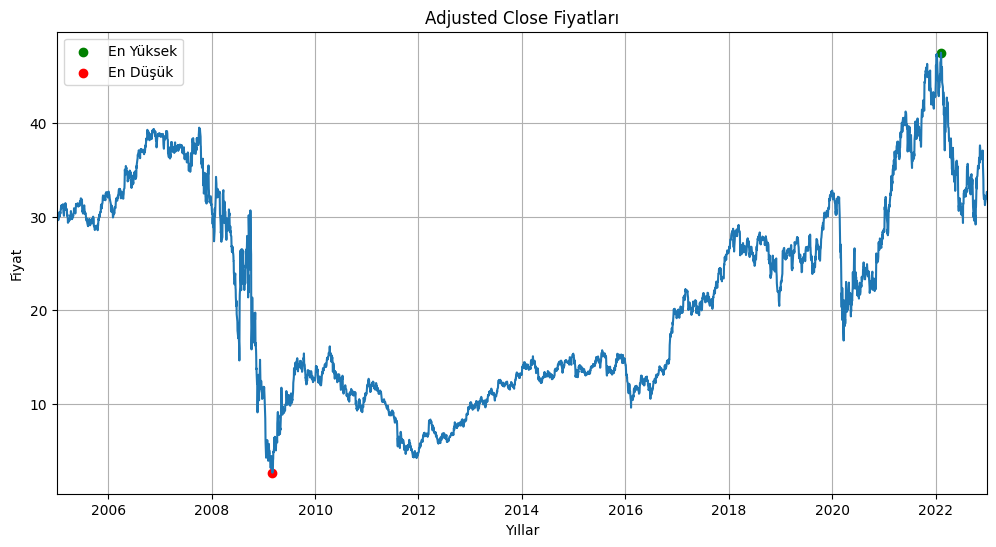

In [608]:
data2 = data.copy()
data2['Date'] = pd.to_datetime(data2['Date'])
data2.set_index('Date', inplace=True)
data2 = data2.loc['2005':'2022']

plt.figure(figsize=(12, 6))
plt.plot(data2.index, data2['Adj Close'])
plt.title('Adjusted Close Fiyatları')
plt.xlabel('Yıllar')
plt.ylabel('Fiyat')
plt.grid(True)

highest_date = data2['Adj Close'].idxmax()
highest_value = data2['Adj Close'].max()
lowest_date = data2['Adj Close'].idxmin()
lowest_value = data2['Adj Close'].min()

plt.scatter(highest_date, highest_value, color='green', label='En Yüksek')
plt.scatter(lowest_date, lowest_value, color='red', label='En Düşük')

plt.xlim(pd.Timestamp('2005-01-03'), pd.Timestamp('2022-12-30'))
plt.legend()
plt.show()

In [609]:
summary_of_strategies = pd.DataFrame(columns=[
    'Stratejinin yıllık getirisi',
    'Bir yılda ortalama işlem sayısı',
    'Ortalama işlem karı',
    'Ortalama işlem uzunluğu',
    'Bir işlemdeki maksimum zarar',
    'Bir işlemdeki maksimum kar',
    'Portföy (kapital) maksimum değeri',
    'Portföy (kapital) minimum değeri',
    'Portföy (kapital) son değeri'
])
initial_money = 10000

summary_of_strategies

,Stratejinin yıllık getirisi,Bir yılda ortalama işlem sayısı,Ortalama işlem karı,Ortalama işlem uzunluğu,Bir işlemdeki maksimum zarar,Bir işlemdeki maksimum kar,Portföy (kapital) maksimum değeri,Portföy (kapital) minimum değeri,Portföy (kapital) son değeri


## Strategy 1

3 Ocak 2005 tarihindeki Adj Close: 30.944794
30 Aralık 2022 tarihindeki Adj Close: 32.646065

30 Aralık 2022 satış: 10549.776159440582
Son durumdaki kar: 549.776159440582


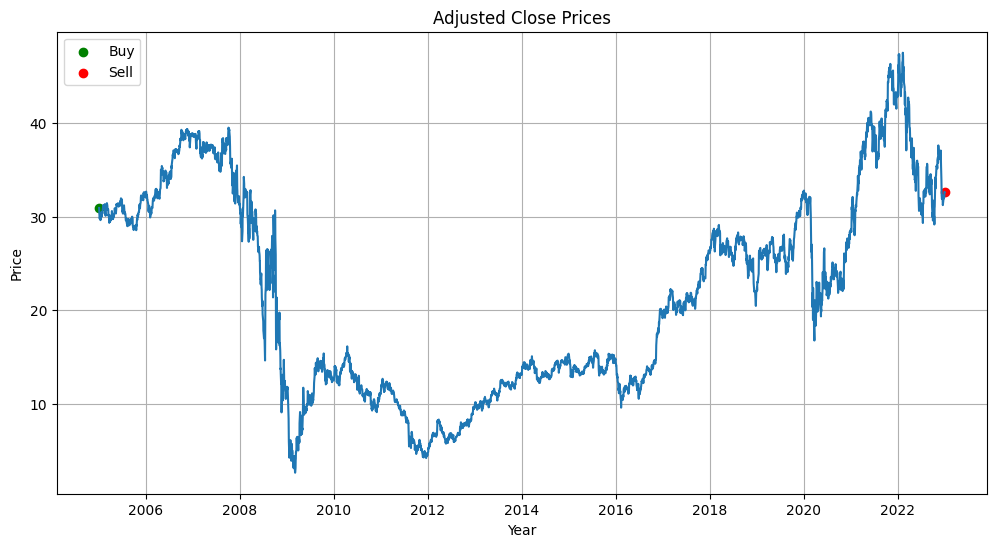

In [610]:
first_adj_close = data.iloc[0]['Adj Close']


last_adj_close = data.iloc[-1]['Adj Close']

print("3 Ocak 2005 tarihindeki Adj Close:", first_adj_close)
print("30 Aralık 2022 tarihindeki Adj Close:", last_adj_close)

print()
stocks = initial_money/first_adj_close

sell_strat_1 = stocks*last_adj_close

print("30 Aralık 2022 satış:", sell_strat_1)

profit_strat1  = sell_strat_1-initial_money

print("Son durumdaki kar:", profit_strat1)

df_strat2 = data.copy()
df_strat2['Date'] = pd.to_datetime(df_strat2['Date'])
df_strat2.set_index('Date', inplace=True)
df_strat2 = df_strat2.loc['2005':'2022']

plt.figure(figsize=(12, 6))
plt.plot(df_strat2.index, df_strat2['Adj Close'])
plt.title('Adjusted Close Prices')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)

buy_date_strat1 = pd.to_datetime('2005-01-03')
sell_date_strat1 = pd.to_datetime('2022-12-30')

buy_price = df_strat2.loc[buy_date_strat1, 'Adj Close']
sell_price = df_strat2.loc[sell_date_strat1, 'Adj Close']

plt.scatter(buy_date_strat1, buy_price, color='green', label='Buy')
plt.scatter(sell_date_strat1, sell_price, color='red', label='Sell')

plt.legend()
plt.show()


In [611]:
beginning_value_strat1 = initial_money
ending_value_strat1  = sell_strat_1
total_years = 17 
num_of_buys_strat1  = 1
num_of_sells_strat1  = 1

portfolio_final_value = ending_value_strat1


annualized_return_strat1  = ((ending_value_strat1  / beginning_value_strat1 ) ** (1 / total_years) - 1)*100

average_trades_per_year_strat1  = (num_of_buys_strat1 + num_of_sells_strat1 )/total_years

average_trade_profit_strat1  = profit_strat1 

average_trade_duration_strat1 = (sell_date_strat1-buy_date_strat1).days

maximum_loss_in_a_trade_strat1 = 0

maximum_profit_in_a_trade_strat1 = profit_strat1

portfolio_max_value = highest_value*stocks

portfolio_minimum_value = lowest_value*stocks

summary_of_strategies.loc['Strateji1 - İşlemler için komisyon alınmadığı durum '] = [
    annualized_return_strat1,
    average_trades_per_year_strat1,
    average_trade_profit_strat1,
    average_trade_duration_strat1,
    maximum_loss_in_a_trade_strat1,
    maximum_profit_in_a_trade_strat1,
    portfolio_max_value,
    portfolio_minimum_value,
    portfolio_final_value
]

annualized_return_strat1_2  = (((ending_value_strat1-2)  / beginning_value_strat1 ) ** (1 / total_years) - 1)*100

average_trade_profit_strat1_2  = profit_strat1 - (num_of_buys_strat1+num_of_sells_strat1) 

maximum_profit_in_a_trade_strat1_2 = profit_strat1 - (num_of_buys_strat1+num_of_sells_strat1) 

portfolio_max_value_2 = (highest_value*stocks) -1

portfolio_minimum_value_2 = (lowest_value*stocks) -1

portfolio_final_value_2 = ending_value_strat1-2


summary_of_strategies.loc['Strateji1 - İşlemler için komisyon alındığı durum '] = [
    annualized_return_strat1_2,
    average_trades_per_year_strat1,
    average_trade_profit_strat1_2,
    average_trade_duration_strat1,
    maximum_loss_in_a_trade_strat1,
    maximum_profit_in_a_trade_strat1_2,
    portfolio_max_value_2,
    portfolio_minimum_value_2,
    portfolio_final_value_2
]

summary_of_strategies

,Stratejinin yıllık getirisi,Bir yılda ortalama işlem sayısı,Ortalama işlem karı,Ortalama işlem uzunluğu,Bir işlemdeki maksimum zarar,Bir işlemdeki maksimum kar,Portföy (kapital) maksimum değeri,Portföy (kapital) minimum değeri,Portföy (kapital) son değeri
Strateji1 - İşlemler için komisyon alınmadığı durum,0.315317,0.117647,549.776159,6570.0,0.0,549.776159,15371.202019,837.484005,10549.776159
Strateji1 - İşlemler için komisyon alındığı durum,0.314198,0.117647,547.776159,6570.0,0.0,547.776159,15370.202019,836.484005,10547.776159


# Strategy 2

In [612]:
df2= data.copy()

df2['Date'] = pd.to_datetime(df2['Date'])

df2.set_index('Date', inplace=True)

df2['Signal'] = ""

df2 = df2.asfreq('B')

df2.loc[df2.index.is_month_end, 'Signal'] = 'Buy'

df2.loc[df2['Signal'] == 'Sell', 'Signal'] = ''
df2['Signal'] = df2['Signal'].fillna(method='ffill')

buys = df2[df2['Signal']=="Buy"]
buys



,Open,High,Low,Close,Adj Close,Volume,Signal
Date,,,,,,,
2005-01-31,45.950001,46.430000,45.900002,46.369999,30.884848,10799200.0,Buy
2005-02-28,46.549999,46.900002,46.330002,46.650002,31.071342,10043400.0,Buy
2005-03-31,44.099998,44.500000,43.860001,44.099998,29.656378,12242400.0,Buy
2005-04-29,44.860001,45.060001,44.360001,45.040001,30.288498,10723600.0,Buy
2005-05-31,46.560001,46.650002,46.320000,46.320000,31.149273,9095400.0,Buy
...,...,...,...,...,...,...,...
2022-08-31,34.139999,34.369999,33.599998,33.610001,32.720905,44917600.0,Buy
2022-09-30,30.760000,31.190001,30.170000,30.200001,29.594830,42294100.0,Buy
2022-10-31,36.000000,36.330002,35.810001,36.040001,35.317802,32565500.0,Buy


In [613]:
df3 = data.copy()
df3['Date'] = pd.to_datetime(df3['Date'])
df3.set_index('Date', inplace=True)

consecutive_rows = df3.groupby(pd.Grouper(freq='M')).apply(lambda x: x[x.index.day > 25].head(4))
first_rows = consecutive_rows.groupby([consecutive_rows.index.get_level_values(0).year, consecutive_rows.index.get_level_values(0).month]).first()

first_rows_dropped_index = consecutive_rows.copy()
first_rows_dropped_index.index = first_rows_dropped_index.index.droplevel(0)

first_rows_monthly = first_rows_dropped_index.groupby(pd.Grouper(freq='M')).nth(0)

first_rows_monthly['Signal'] = 'Sell'

sells = first_rows_monthly
sells



,Open,High,Low,Close,Adj Close,Volume,Signal
Date,,,,,,,
2005-01-26,45.730000,45.919998,45.529999,45.770000,30.485220,7771400,Sell
2005-02-28,46.549999,46.900002,46.330002,46.650002,31.071342,10043400,Sell
2005-03-28,44.029999,44.740002,43.970001,44.290001,29.784153,12028800,Sell
2005-04-26,44.650002,45.009998,44.549999,44.610001,29.999332,7244800,Sell
2005-05-26,46.730000,46.799999,46.500000,46.709999,31.411535,6935700,Sell
...,...,...,...,...,...,...,...
2022-08-26,35.439999,35.480000,34.020000,34.029999,33.129791,36152600,Sell
2022-09-26,31.320000,31.820000,30.680000,31.030001,30.408197,40360200,Sell
2022-10-26,35.419998,36.090000,35.349998,35.700001,34.984619,41104600,Sell


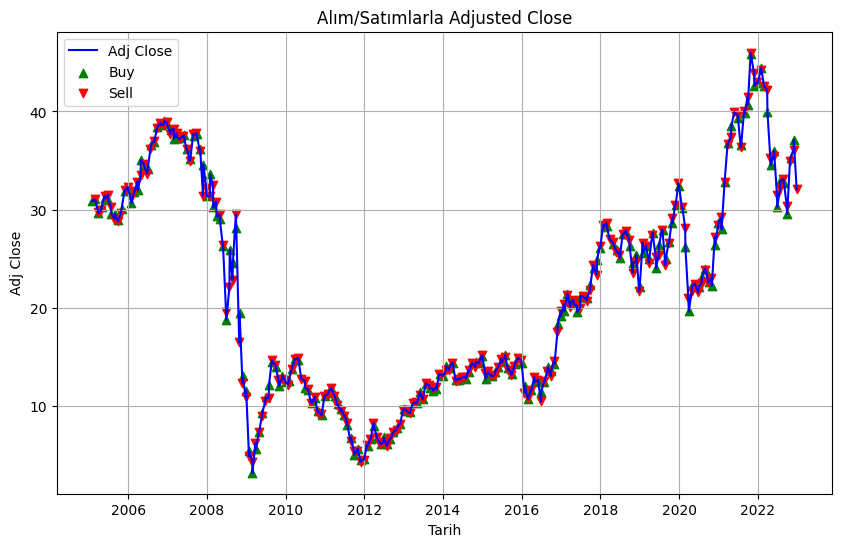

In [614]:
combined_df = pd.concat([buys, sells])

combined_data = combined_df.sort_values('Date')

combined_data = combined_data.drop(combined_data.index[0])
combined_data = combined_data.drop(combined_data.index[-1])

combined_data.dropna(inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data['Adj Close'], color='blue', label='Adj Close')
plt.scatter(combined_data[combined_data['Signal'] == 'Buy'].index, combined_data[combined_data['Signal'] == 'Buy']['Adj Close'], color='green', marker='^', label='Buy')
plt.scatter(combined_data[combined_data['Signal'] == 'Sell'].index, combined_data[combined_data['Signal'] == 'Sell']['Adj Close'], color='red', marker='v', label='Sell')
plt.xlabel('Tarih')
plt.ylabel('Adj Close')
plt.title('Alım/Satımlarla Adjusted Close')
plt.legend()
plt.grid(True)
plt.show()

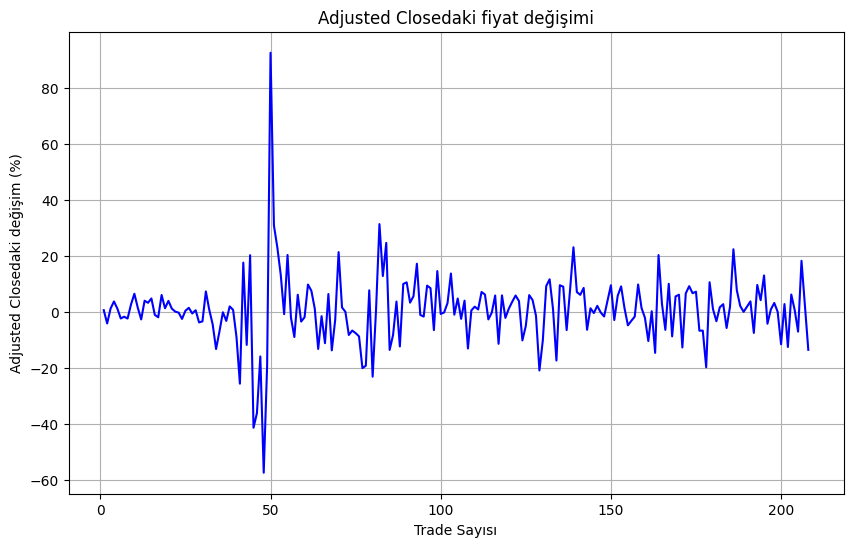

,0
0,0.603837
1,-4.142689
2,1.156426
3,3.707800
4,1.155475
...,...
203,0.650682
204,-7.067983
205,18.211928
206,2.275266


In [615]:
buy_sell_diff = []
buy_sell_diff_with_commissions = []

for i in range(len(combined_data)-1):
    if combined_data['Signal'].iloc[i] == 'Buy' and combined_data['Signal'].iloc[i+1] == 'Sell':
        diff = combined_data['Adj Close'].iloc[i+1] - combined_data['Adj Close'].iloc[i]

        diff2 = (diff-0.5)*(1/combined_data['Adj Close'].iloc[i])
        
        diff = diff*(100/combined_data['Adj Close'].iloc[i])
        diff2 = diff+diff2
        
        buy_sell_diff.append(diff)
        buy_sell_diff_with_commissions.append(diff2)


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(buy_sell_diff)+1), buy_sell_diff, color='blue')
plt.xlabel('Trade Sayısı')
plt.ylabel('Adjusted Closedaki değişim (%)')
plt.title('Adjusted Closedaki fiyat değişimi')
plt.grid(True)
plt.show()

trade_df = pd.DataFrame(buy_sell_diff)

trade_df




Strateji 2nin karı -2124.663507952231


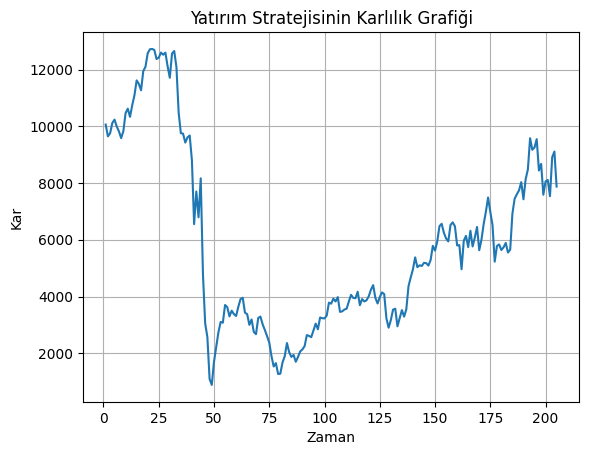

In [616]:
cumulative_profits = []
profit_strat2 = initial_money
for i in range(0, len(buy_sell_diff)):

    if(buy_sell_diff[i]!=0):
        profit_strat2 = profit_strat2 + (profit_strat2*(buy_sell_diff[i]/100))
        cumulative_profits.append(profit_strat2)



x = range(1, len(cumulative_profits) + 1) 
y = cumulative_profits  

profit_strat2 = profit_strat2 - initial_money

print("Strateji 2nin karı",profit_strat2)

plt.plot(x, y)
plt.xlabel('Zaman')
plt.ylabel('Kar')
plt.title('Yatırım Stratejisinin Karlılık Grafiği')
plt.grid(True)
plt.show()

In [617]:
dates = combined_data.index.get_level_values('Date')

days_passed = []
for i in range(1, len(dates)):
    date1 = dates[i-1]
    date2 = dates[i]
    days = (date2 - date1).days
    days_passed.append(days)
   

split1 = days_passed[0:127]
split2 = days_passed[127:]
del split2[68]
del split2[186]
del split2[260]

odd_indices_split1 = split1[::2]
odd_indices_split2 = split2[::2]

days_passed = odd_indices_split1 + odd_indices_split2


In [618]:

average_trades_per_year_strat2 = len(buy_sell_diff)/total_years 

average_trade_profit_strat2 = np.mean(buy_sell_diff)

average_trade_duration_strat2 = np.mean(days_passed)



minimum_difference = float('inf')  
maximum_profit = 0
maximum_profit_index = 0
maximum_loss_index = 0

for i in range(len(cumulative_profits) - 1):
    difference = cumulative_profits[i+1] - cumulative_profits[i]
    profit = cumulative_profits[i+1] - cumulative_profits[i]

    maximum_profit = max(maximum_profit, profit)

    minimum_difference = min(minimum_difference, difference)


   
maximum_loss_in_a_trade_strat2 = minimum_difference

maximum_profit_in_a_trade_strat2 = maximum_profit

portfolio_max_value_strat2 = max(cumulative_profits)

portfolio_minimum_value_strat2 = min(cumulative_profits)

annualized_return_strat2  = ((cumulative_profits[-1]  / initial_money ) ** (1 / total_years) - 1)*100

portfolio_final_value_strat2 = cumulative_profits[-1]

summary_of_strategies.loc['Strateji2 - İşlemler için komisyon alınmadığı durum '] = [
    annualized_return_strat2,
    average_trades_per_year_strat2,
    average_trade_profit_strat2,
    average_trade_duration_strat2,
    maximum_loss_in_a_trade_strat2,
    maximum_profit_in_a_trade_strat2,
    portfolio_max_value_strat2,
    portfolio_minimum_value_strat2,
    portfolio_final_value_strat2
]

annualized_return_strat2_2  = (((cumulative_profits[-1]-len(cumulative_profits))   / initial_money ) ** (1 / total_years) - 1)*100

average_trade_profit_strat2_2  = np.mean(buy_sell_diff_with_commissions)

maximum_profit_in_a_trade_strat2_2 =  maximum_profit -2

maximum_loss_in_a_trade_strat2_2 = minimum_difference - 2

portfolio_max_value_2_2 = max(cumulative_profits) - 42

portfolio_minimum_value_2_2 = min(cumulative_profits) - 43

portfolio_final_value_2_2 = cumulative_profits[-1]-len(cumulative_profits)

summary_of_strategies.loc['Strateji2 - İşlemler için komisyon alındığı durum '] = [
    annualized_return_strat2_2,
    average_trades_per_year_strat2,
    average_trade_profit_strat2_2,
    average_trade_duration_strat2,
    maximum_loss_in_a_trade_strat2_2,
    maximum_profit_in_a_trade_strat2_2,
    portfolio_max_value_2_2,
    portfolio_minimum_value_2_2,
    portfolio_final_value_2_2
]
summary_of_strategies


,Stratejinin yıllık getirisi,Bir yılda ortalama işlem sayısı,Ortalama işlem karı,Ortalama işlem uzunluğu,Bir işlemdeki maksimum zarar,Bir işlemdeki maksimum kar,Portföy (kapital) maksimum değeri,Portföy (kapital) minimum değeri,Portföy (kapital) son değeri
Strateji1 - İşlemler için komisyon alınmadığı durum,0.315317,0.117647,549.776159,6570.000000,0.000000,549.776159,15371.202019,837.484005,10549.776159
Strateji1 - İşlemler için komisyon alındığı durum,0.314198,0.117647,547.776159,6570.000000,0.000000,547.776159,15370.202019,836.484005,10547.776159
Strateji2 - İşlemler için komisyon alınmadığı durum,-1.395171,12.235294,0.680807,26.938679,-3375.745026,1372.910344,12725.637022,885.823879,7875.336492
Strateji2 - İşlemler için komisyon alındığı durum,-1.548038,12.235294,0.655426,26.938679,-3377.745026,1370.910344,12683.637022,842.823879,7670.336492


# Strategy 3


In [619]:
data['Date'] = pd.to_datetime(data['Date'])


years_to_check = [2008, 2009, 2014, 2015, 2020]


november_1st_data = data[data['Date'].dt.month == 11][data['Date'].dt.day == 1]


for year in years_to_check:
    november_1st_row = data[(data['Date'].dt.year == year) & (data['Date'].dt.month == 11) & (data['Date'].dt.day == 1)]
    if november_1st_row.empty:
        next_day_row = data[(data['Date'].dt.year == year) & (data['Date'] > pd.Timestamp(f"{year}-11-01"))].head(1)
        november_1st_data = pd.concat([november_1st_data, next_day_row])
    else:
        november_1st_data = pd.concat([november_1st_data, november_1st_row])

november_1st_data = november_1st_data.sort_values('Date')


filtered_data = pd.DataFrame()

for year in data['Date'].dt.year.unique():
    year_data = data[data['Date'].dt.year == year]
    after_april_25_data = year_data[year_data['Date'] > pd.Timestamp(f"{year}-04-25")].head(1)
    filtered_data = pd.concat([filtered_data, after_april_25_data])

filtered_data = filtered_data.sort_values('Date')

combined_data = pd.concat([november_1st_data, filtered_data])


combined_data = combined_data.sort_values('Date')
combined_data = combined_data.drop(combined_data.index[0])
combined_data = combined_data.drop(combined_data.index[-1])
combined_data['Label'] = ['Buy' if date.month == 11 else 'Sell' for date in combined_data['Date']]


combined_data


C:\Users\oguzd\AppData\Local\Temp\ipykernel_2020\1766502633.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  november_1st_data = data[data['Date'].dt.month == 11][data['Date'].dt.day == 1]


,Date,Open,High,Low,Close,Adj Close,Volume,Label
210,2005-11-01,43.750000,43.860001,43.270000,43.619999,29.969011,19218600,Buy
330,2006-04-26,47.099998,47.779999,47.049999,47.709999,33.498497,19058900,Sell
462,2006-11-01,54.150002,54.150002,53.500000,53.580002,38.421692,12654100,Buy
581,2007-04-26,51.000000,51.169998,50.650002,50.720001,37.159660,14693900,Sell
713,2007-11-01,46.750000,47.000000,45.480000,45.709999,34.289158,48004100,Buy
834,2008-04-28,38.380001,38.570000,37.860001,38.180000,29.544058,24256800,Sell
966,2008-11-03,23.969999,24.059999,23.100000,23.610001,19.000221,59182300,Buy
1085,2009-04-27,8.660000,9.290000,8.650000,8.920000,7.362063,332356100,Sell
1217,2009-11-02,14.850000,15.230000,14.120000,14.630000,12.092708,307863100,Buy
1336,2010-04-26,18.410000,18.440001,18.030001,18.049999,14.938041,160873000,Sell


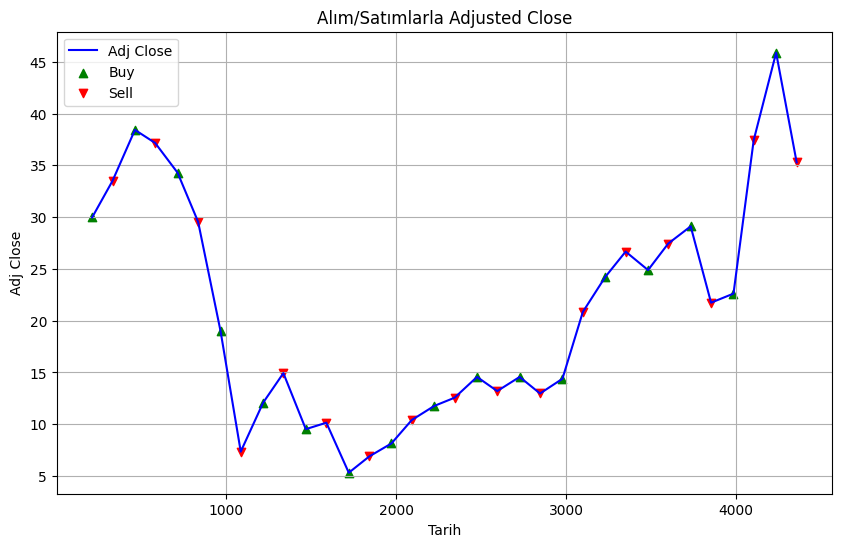

In [620]:
plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data['Adj Close'], color='blue', label='Adj Close')
plt.scatter(combined_data[combined_data['Label'] == 'Buy'].index, combined_data[combined_data['Label'] == 'Buy']['Adj Close'], color='green', marker='^', label='Buy')
plt.scatter(combined_data[combined_data['Label'] == 'Sell'].index, combined_data[combined_data['Label'] == 'Sell']['Adj Close'], color='red', marker='v', label='Sell')
plt.xlabel('Tarih')
plt.ylabel('Adj Close')
plt.title('Alım/Satımlarla Adjusted Close')
plt.legend()
plt.grid(True)
plt.show()

18


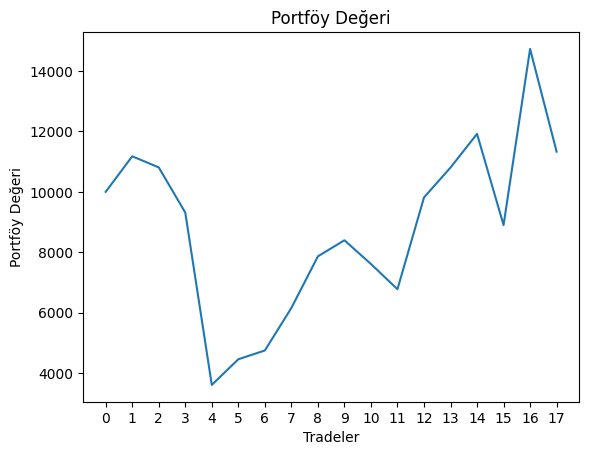

In [621]:

percentage_changes = []

for i in range(0, len(combined_data)):
    if combined_data['Label'].iloc[i] == 'Buy' and combined_data['Label'].iloc[i+1] == 'Sell':
        buy_price = combined_data['Adj Close'].iloc[i]
        sell_price = combined_data['Adj Close'].iloc[i+1]
        percentage_change = ((sell_price - buy_price) / buy_price) * 100
        percentage_changes.append(percentage_change)



portfolio_value = [initial_money]

for change in percentage_changes:
    portfolio_value.append(portfolio_value[-1] * (1 + change / 100))


trades = range(18) 

print(len(portfolio_value))
plt.plot(trades, portfolio_value)
plt.xlabel('Tradeler')
plt.ylabel('Portföy Değeri')
plt.title('Portföy Değeri')
plt.xticks(trades)
plt.show()




In [622]:
number_of_trades = len(portfolio_value)-1
final_value = portfolio_value[-1]
annualized_return = ((final_value / initial_money) ** (1 / number_of_trades)) - 1
annualized_return *= 100


annualized_return_strat3 = annualized_return
average_trades_per_year_strat3 = 32/17

trade_profits = np.diff(portfolio_value)  

average_trade_profit = np.mean(trade_profits)

average_trade_profit_strat3 = average_trade_profit

df6 = combined_data.copy()

df6['Date'] = pd.to_datetime(df6['Date'])


df6['Trade_Number'] = df6['Label'].eq('Buy').cumsum()


trade_durations = df6.groupby('Trade_Number')['Date'].apply(lambda x: x.iloc[-1] - x.iloc[0]).dt.days


average_trade_duration = trade_durations.mean()


average_trade_duration_strat3 = average_trade_duration



differences = [portfolio_value[i] - portfolio_value[i-1] for i in range(1, len(portfolio_value))]
maximum_negative_difference = min(differences)
maximum_positive_difference = max(differences)

maximum_loss_in_a_trade_strat3 = maximum_negative_difference

maximum_profit_in_a_trade_strat3 = maximum_positive_difference

portfolio_max_value_strat3 = max(portfolio_value)

portfolio_minimum_value_strat3 = min(portfolio_value)

portfolio_final_value_strat3 = portfolio_value[-1]

summary_of_strategies.loc['Strateji3 - İşlemler için komisyon alınmadığı durum '] = [

    annualized_return_strat3,
    average_trades_per_year_strat3,
    average_trade_profit_strat3,
    average_trade_duration_strat3,
    maximum_loss_in_a_trade_strat3,
    maximum_profit_in_a_trade_strat3,
    portfolio_max_value_strat3,
    portfolio_minimum_value_strat3,
    portfolio_final_value_strat3
]

maximum_loss_in_a_trade_strat3_3 = maximum_negative_difference-2

maximum_profit_in_a_trade_strat3_3 = maximum_positive_difference-2

portfolio_max_value_strat3_3 = max(portfolio_value)-32

portfolio_minimum_value_strat3_3 = min(portfolio_value) - 8

trade_profits3 = trade_profits-1

average_trade_profit_strat3_3 = np.mean(trade_profits3)

portfolio_value_commissions = portfolio_value

for i in range(1,len(portfolio_value_commissions)):

    portfolio_value_commissions[i] = portfolio_value_commissions[i] - ((i+1)*2)

number_of_trades = len(portfolio_value_commissions)-1
final_value = portfolio_value_commissions[-1]
annualized_return2 = ((final_value / initial_money) ** (1 / number_of_trades)) - 1
annualized_return2 *= 100

annualized_return_strat3_3 = annualized_return2

portfolio_final_value_strat3_3 = final_value

summary_of_strategies.loc['Strateji3 - İşlemler için komisyon alındığı durum '] = [
    annualized_return_strat3_3,
    average_trades_per_year_strat3,
    average_trade_profit_strat3_3,
    average_trade_duration_strat3,
    maximum_loss_in_a_trade_strat3_3,
    maximum_profit_in_a_trade_strat3_3,
    portfolio_max_value_strat3_3,
    portfolio_minimum_value_strat3_3,
    portfolio_final_value_strat3_3
]

summary_of_strategies

,Stratejinin yıllık getirisi,Bir yılda ortalama işlem sayısı,Ortalama işlem karı,Ortalama işlem uzunluğu,Bir işlemdeki maksimum zarar,Bir işlemdeki maksimum kar,Portföy (kapital) maksimum değeri,Portföy (kapital) minimum değeri,Portföy (kapital) son değeri
Strateji1 - İşlemler için komisyon alınmadığı durum,0.315317,0.117647,549.776159,6570.000000,0.000000,549.776159,15371.202019,837.484005,10549.776159
Strateji1 - İşlemler için komisyon alındığı durum,0.314198,0.117647,547.776159,6570.000000,0.000000,547.776159,15370.202019,836.484005,10547.776159
Strateji2 - İşlemler için komisyon alınmadığı durum,-1.395171,12.235294,0.680807,26.938679,-3375.745026,1372.910344,12725.637022,885.823879,7875.336492
Strateji2 - İşlemler için komisyon alındığı durum,-1.548038,12.235294,0.655426,26.938679,-3377.745026,1370.910344,12683.637022,842.823879,7670.336492
Strateji3 - İşlemler için komisyon alınmadığı durum,0.737790,1.882353,78.298550,176.235294,-5705.412889,5830.400033,14731.666626,3609.128621,11331.075343
Strateji3 - İşlemler için komisyon alındığı durum,0.718935,1.882353,77.298550,176.235294,-5707.412889,5828.400033,14699.666626,3601.128621,11295.075343


# Strategy 4


In [623]:
combined_data4 = []
holding_stock = False

for index, row in data.iterrows():
    date = row['Date']
    close_price = row['Close']
    adjusted_close = row['Adj Close']
    open_price = row['Open']
    
    if holding_stock:
        combined_data4.append({'Date': date, 'Action': 'Sell','Adj Close':adjusted_close, 'Price': close_price})
        holding_stock = False
    else:
        if close_price > open_price:
            combined_data4.append({'Date': date, 'Action': 'Buy','Adj Close':adjusted_close, 'Price': close_price})
            holding_stock = True

combined_data4 = pd.DataFrame(combined_data4)
combined_data4 = combined_data4.sort_values('Date')
combined_data4 = combined_data4.drop(combined_data4.index[-1])
combined_data4

,Date,Action,Adj Close,Price
0,2005-01-10,Buy,30.165506,45.290001
1,2005-01-11,Sell,30.092251,45.180000
2,2005-01-14,Buy,29.899075,44.889999
3,2005-01-18,Sell,30.458565,45.730000
4,2005-01-20,Buy,30.178818,45.310001
...,...,...,...,...
2981,2022-12-22,Sell,31.926514,32.389999
2982,2022-12-23,Buy,32.005371,32.470001
2983,2022-12-27,Sell,32.064510,32.529999
2984,2022-12-28,Buy,32.301079,32.770000


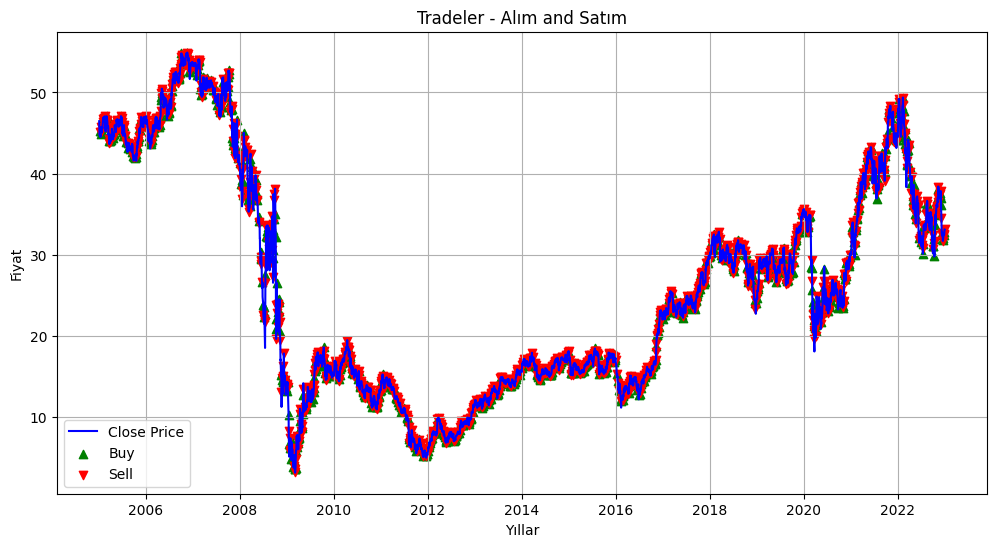

In [624]:
combined_data4['Date'] = pd.to_datetime(combined_data4['Date'])


plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], color='blue', label='Close Price')
plt.scatter(combined_data4[combined_data4['Action'] == 'Buy']['Date'], combined_data4[combined_data4['Action'] == 'Buy']['Price'], color='green', marker='^', label='Buy')
plt.scatter(combined_data4[combined_data4['Action'] == 'Sell']['Date'], combined_data4[combined_data4['Action'] == 'Sell']['Price'], color='red', marker='v', label='Sell')
plt.xlabel('Yıllar')
plt.ylabel('Fiyat')
plt.title('Tradeler - Alım and Satım')
plt.legend()
plt.grid(True)
plt.show()

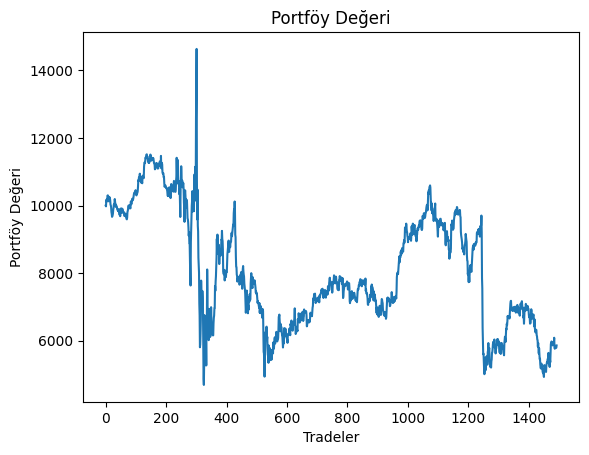

In [625]:
percentage_changes4 = []

for i in range(0, len(combined_data4)):
    if combined_data4['Action'].iloc[i] == 'Buy' and combined_data4['Action'].iloc[i+1] == 'Sell':
        buy_price = combined_data4['Adj Close'].iloc[i]
        sell_price = combined_data4['Adj Close'].iloc[i+1]
        percentage_change = ((sell_price - buy_price) / buy_price) * 100
        percentage_changes4.append(percentage_change)



portfolio_value4 = [initial_money]

for change in percentage_changes4:
    portfolio_value4.append(portfolio_value4[-1] * (1 + change / 100))


plt.plot(portfolio_value4)
plt.xlabel('Tradeler')
plt.ylabel('Portföy Değeri')
plt.title('Portföy Değeri')
plt.show()

In [626]:
differences4 = [portfolio_value4[i] - portfolio_value4[i-1] for i in range(1, len(portfolio_value4))]
maximum_negative_difference4 = min(differences4)
maximum_positive_difference4 = max(differences4)


maximum_loss_in_a_trade_strat4 = maximum_negative_difference4

maximum_profit_in_a_trade_strat4 = maximum_positive_difference4

portfolio_max_value_strat4 = max(portfolio_value4)

portfolio_minimum_value_strat4 = min(portfolio_value4)

df4 = combined_data4.copy()
df4['Date'] = pd.to_datetime(df4['Date'])
df4['Trade_Number'] = df4['Action'].eq('Buy').cumsum()
trade_durations4 = df4.groupby('Trade_Number')['Date'].apply(lambda x: x.iloc[-1] - x.iloc[0]).dt.days
average_trade_duration4 = trade_durations4.mean()
average_trade_duration_strat4 = average_trade_duration4

trade_profits4 = np.diff(portfolio_value4)  

average_trade_profit4 = np.mean(trade_profits4)

average_trade_profit_strat4 = average_trade_profit4

average_trades_per_year_strat4 = len(portfolio_value4)/17

number_of_trades4 = len(portfolio_value4)-1
final_value4 = portfolio_value4[-1]
annualized_return4 = ((final_value4 / initial_money) ** (1 / number_of_trades4)) - 1
annualized_return4 *= 100

annualized_return_strat4 = annualized_return4

portfolio_final_value_strat4 = final_value4

summary_of_strategies.loc['Strateji4 - İşlemler için komisyon alınmadığı durum '] = [

    annualized_return_strat4,
    average_trades_per_year_strat4,
    average_trade_profit_strat4,
    average_trade_duration_strat4,
    maximum_loss_in_a_trade_strat4,
    maximum_profit_in_a_trade_strat4,
    portfolio_max_value_strat4,
    portfolio_minimum_value_strat4,
    portfolio_final_value_strat4
]

max_index = portfolio_value4.index(max(portfolio_value4))
portfolio_max_value_strat4_4 = max(portfolio_value4) - 2*(max_index)


min_index = portfolio_value4.index(min(portfolio_value4))
portfolio_minimum_value_strat4_4 = min(portfolio_value4) - 2*(min_index)

maximum_loss_in_a_trade_strat4_4 = maximum_negative_difference4 -2

maximum_profit_in_a_trade_strat4_4 = maximum_positive_difference4 -2

trade_profits4 = trade_profits4-1

average_trade_profit_strat4_4 = np.mean(trade_profits4)


portfolio_value_commissions4 = portfolio_value4

for i in range(1,len(portfolio_value_commissions4)):

    portfolio_value_commissions4[i] = portfolio_value_commissions4[i] - ((i+1)*2)

number_of_trades4 = len(portfolio_value_commissions4)-1
final_value4 = portfolio_value_commissions4[-1]
annualized_return4 = ((final_value4 / initial_money) ** (1 / number_of_trades4)) - 1
annualized_return4 *= 100

annualized_return_strat4_4 = annualized_return4

portfolio_final_value_strat4_4 = final_value4

summary_of_strategies.loc['Strateji4 - İşlemler için komisyon alındığı durum '] = [

    annualized_return_strat4_4,
    average_trades_per_year_strat4,
    average_trade_profit_strat4_4,
    average_trade_duration_strat4,
    maximum_loss_in_a_trade_strat4_4,
    maximum_profit_in_a_trade_strat4_4,
    portfolio_max_value_strat4_4,
    portfolio_minimum_value_strat4_4,
    portfolio_final_value_strat4_4
]

summary_of_strategies




,Stratejinin yıllık getirisi,Bir yılda ortalama işlem sayısı,Ortalama işlem karı,Ortalama işlem uzunluğu,Bir işlemdeki maksimum zarar,Bir işlemdeki maksimum kar,Portföy (kapital) maksimum değeri,Portföy (kapital) minimum değeri,Portföy (kapital) son değeri
Strateji1 - İşlemler için komisyon alınmadığı durum,0.315317,0.117647,549.776159,6570.000000,0.000000,549.776159,15371.202019,837.484005,10549.776159
Strateji1 - İşlemler için komisyon alındığı durum,0.314198,0.117647,547.776159,6570.000000,0.000000,547.776159,15370.202019,836.484005,10547.776159
Strateji2 - İşlemler için komisyon alınmadığı durum,-1.395171,12.235294,0.680807,26.938679,-3375.745026,1372.910344,12725.637022,885.823879,7875.336492
Strateji2 - İşlemler için komisyon alındığı durum,-1.548038,12.235294,0.655426,26.938679,-3377.745026,1370.910344,12683.637022,842.823879,7670.336492
Strateji3 - İşlemler için komisyon alınmadığı durum,0.737790,1.882353,78.298550,176.235294,-5705.412889,5830.400033,14731.666626,3609.128621,11331.075343
Strateji3 - İşlemler için komisyon alındığı durum,0.718935,1.882353,77.298550,176.235294,-5707.412889,5828.400033,14699.666626,3601.128621,11295.075343
Strateji4 - İşlemler için komisyon alınmadığı durum,-0.035771,87.882353,-2.771870,1.456798,-3837.578942,2315.743403,14632.760908,4694.039651,5861.597484
Strateji4 - İşlemler için komisyon alındığı durum,-0.083490,87.882353,-3.771870,1.456798,-3839.578942,2313.743403,14030.760908,4044.039651,2873.597484


# Strategy 5

In [627]:
combined_data5 = []
previous_action = "Sell"  

for index, row in data.iterrows():
    date = row['Date']
    close_price = row['Close']
    adjusted_close = row['Adj Close']
    open_price = row['Open']
    
    if previous_action == "Sell":
        if close_price < open_price:
            combined_data5.append({'Date': date, 'Action': 'Buy','Open':open_price,'Close':close_price,'Adj Close':adjusted_close, 'Price': close_price})
            previous_action = "Buy"
    else:  
        if close_price > open_price:
            combined_data5.append({'Date': date, 'Action': 'Sell','Open':open_price,'Close':close_price,'Adj Close':adjusted_close, 'Price': close_price})
            previous_action = "Sell"

combined_data5 = pd.DataFrame(combined_data5)
combined_data5



,Date,Action,Open,Close,Adj Close,Price
0,2005-01-03,Buy,46.660000,46.459999,30.944794,46.459999
1,2005-01-10,Sell,44.779999,45.290001,30.165506,45.290001
2,2005-01-12,Buy,45.180000,45.060001,30.012327,45.060001
3,2005-01-14,Sell,44.849998,44.889999,29.899075,44.889999
4,2005-01-19,Buy,45.250000,44.970001,29.952379,44.970001
...,...,...,...,...,...,...
2323,2022-12-15,Sell,31.750000,31.770000,31.315388,31.770000
2324,2022-12-20,Buy,32.400002,32.189999,31.729374,32.189999
2325,2022-12-21,Sell,32.520000,32.680000,32.212364,32.680000
2326,2022-12-22,Buy,32.520000,32.389999,31.926514,32.389999


[-2.518316974415797, -0.3773516128889281, 0.7559967106452518, 0.2883162557751658, 0.3733443639272927, 1.0560290719596495, 0.5360138219979957, 1.055152228341239, 0.2349816930219608, -1.358965708772619, 0.9713091777436913, -0.45190198993995057, 0.3501003210494812, 0.06553730797027411, -1.317517136888579, -0.7223690886451245, 1.2343326195574607, 0.2961801575489503, 0.3409095478224051, 0.6544153403010119, 0.3345907603725023, -0.8423643719058985, 0.3165332679661992, 0.5828096438947447, 0.5275583586059087, 1.1248580201774665, -0.12843052719327147, 0.9156329266496809, -0.6063529704458777, 0.5014917724131507, -0.17390930216126965, 0.6030341051381639, 0.3218455037300221, 0.5818872871871283, -1.0962457657883835, -0.044731064113072344, 0.3099245221999756, -0.48803755604517574, 0.5606000098722778, -1.6121726548403128, -1.37046109057406, 0.16010219816574156, -0.5960025655820058, 1.0094258889189074, 1.0253854260444573, -1.5008217997890878, 2.4390436222321124, -2.6733900039344523, 0.2380891734975671,

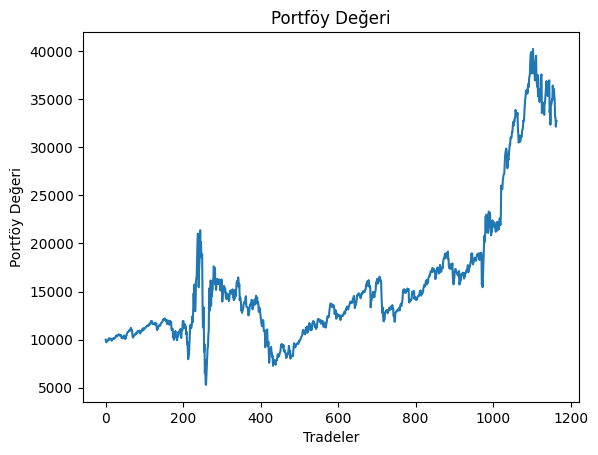

In [628]:
percentage_changes5 = []

for i in range(0, len(combined_data5)):

    if combined_data5['Action'].iloc[i] == 'Buy' and combined_data5['Action'].iloc[i+1] == 'Sell':
        buy_price = combined_data5['Adj Close'].iloc[i]
        sell_price = combined_data5['Adj Close'].iloc[i+1]
        percentage_change = ((sell_price - buy_price) / buy_price) * 100
        percentage_changes5.append(percentage_change)


print(percentage_changes5)

portfolio_value5 = [initial_money]

for change in percentage_changes5:
    portfolio_value5.append(portfolio_value5[-1] * (1 + change / 100))


plt.plot(portfolio_value5)
plt.xlabel('Tradeler')
plt.ylabel('Portföy Değeri')
plt.title('Portföy Değeri')
plt.show()

In [629]:
differences5 = [portfolio_value5[i] - portfolio_value5[i-1] for i in range(1, len(portfolio_value5))]
maximum_negative_difference5 = min(differences5)
maximum_positive_difference5 = max(differences5)


maximum_loss_in_a_trade_strat5 = maximum_negative_difference5

maximum_profit_in_a_trade_strat5 = maximum_positive_difference5

portfolio_max_value_strat5 = max(portfolio_value5)

portfolio_minimum_value_strat5 = min(portfolio_value5)

df5 = combined_data5.copy()
df5['Date'] = pd.to_datetime(df5['Date'])
df5['Trade_Number'] = df5['Action'].eq('Buy').cumsum()
trade_durations5 = df5.groupby('Trade_Number')['Date'].apply(lambda x: x.iloc[-1] - x.iloc[0]).dt.days

average_trade_duration5 = trade_durations5.mean()
average_trade_duration_strat5 = average_trade_duration5

trade_profits5 = np.diff(portfolio_value5)  

average_trade_profit5 = np.mean(trade_profits5)

average_trade_profit_strat5 = average_trade_profit5

average_trades_per_year_strat5 = len(portfolio_value5)/17

number_of_trades5 = len(portfolio_value5)-1
final_value5 = portfolio_value5[-1]
annualized_return5 = ((final_value5 / initial_money) ** (1 / number_of_trades5)) - 1
annualized_return5 *= 100

annualized_return_strat5 = annualized_return5

portfolio_final_value_strat5 = final_value5

summary_of_strategies.loc['Strateji5 - Long Durum'] = [

    annualized_return_strat5,
    average_trades_per_year_strat5,
    average_trade_profit_strat5,
    average_trade_duration_strat5,
    maximum_loss_in_a_trade_strat5,
    maximum_profit_in_a_trade_strat5,
    portfolio_max_value_strat5,
    portfolio_minimum_value_strat5,
    portfolio_final_value_strat5
]

summary_of_strategies


,Stratejinin yıllık getirisi,Bir yılda ortalama işlem sayısı,Ortalama işlem karı,Ortalama işlem uzunluğu,Bir işlemdeki maksimum zarar,Bir işlemdeki maksimum kar,Portföy (kapital) maksimum değeri,Portföy (kapital) minimum değeri,Portföy (kapital) son değeri
Strateji1 - İşlemler için komisyon alınmadığı durum,0.315317,0.117647,549.776159,6570.000000,0.000000,549.776159,15371.202019,837.484005,10549.776159
Strateji1 - İşlemler için komisyon alındığı durum,0.314198,0.117647,547.776159,6570.000000,0.000000,547.776159,15370.202019,836.484005,10547.776159
Strateji2 - İşlemler için komisyon alınmadığı durum,-1.395171,12.235294,0.680807,26.938679,-3375.745026,1372.910344,12725.637022,885.823879,7875.336492
Strateji2 - İşlemler için komisyon alındığı durum,-1.548038,12.235294,0.655426,26.938679,-3377.745026,1370.910344,12683.637022,842.823879,7670.336492
Strateji3 - İşlemler için komisyon alınmadığı durum,0.737790,1.882353,78.298550,176.235294,-5705.412889,5830.400033,14731.666626,3609.128621,11331.075343
Strateji3 - İşlemler için komisyon alındığı durum,0.718935,1.882353,77.298550,176.235294,-5707.412889,5828.400033,14699.666626,3601.128621,11295.075343
Strateji4 - İşlemler için komisyon alınmadığı durum,-0.035771,87.882353,-2.771870,1.456798,-3837.578942,2315.743403,14632.760908,4694.039651,5861.597484
Strateji4 - İşlemler için komisyon alındığı durum,-0.083490,87.882353,-3.771870,1.456798,-3839.578942,2313.743403,14030.760908,4044.039651,2873.597484
Strateji5 - Long Durum,0.101888,68.529412,19.518155,2.920962,-4832.218575,3870.413277,40230.028388,5286.568955,32719.131976


In [630]:
combined_data5

,Date,Action,Open,Close,Adj Close,Price
0,2005-01-03,Buy,46.660000,46.459999,30.944794,46.459999
1,2005-01-10,Sell,44.779999,45.290001,30.165506,45.290001
2,2005-01-12,Buy,45.180000,45.060001,30.012327,45.060001
3,2005-01-14,Sell,44.849998,44.889999,29.899075,44.889999
4,2005-01-19,Buy,45.250000,44.970001,29.952379,44.970001
...,...,...,...,...,...,...
2323,2022-12-15,Sell,31.750000,31.770000,31.315388,31.770000
2324,2022-12-20,Buy,32.400002,32.189999,31.729374,32.189999
2325,2022-12-21,Sell,32.520000,32.680000,32.212364,32.680000
2326,2022-12-22,Buy,32.520000,32.389999,31.926514,32.389999


In [631]:
combined_data5short = combined_data5.copy()
combined_data5short['Action'] = combined_data5short['Action'].map({'Buy': 'Sell', 'Sell': 'Buy'})
combined_data5short

,Date,Action,Open,Close,Adj Close,Price
0,2005-01-03,Sell,46.660000,46.459999,30.944794,46.459999
1,2005-01-10,Buy,44.779999,45.290001,30.165506,45.290001
2,2005-01-12,Sell,45.180000,45.060001,30.012327,45.060001
3,2005-01-14,Buy,44.849998,44.889999,29.899075,44.889999
4,2005-01-19,Sell,45.250000,44.970001,29.952379,44.970001
...,...,...,...,...,...,...
2323,2022-12-15,Buy,31.750000,31.770000,31.315388,31.770000
2324,2022-12-20,Sell,32.400002,32.189999,31.729374,32.189999
2325,2022-12-21,Buy,32.520000,32.680000,32.212364,32.680000
2326,2022-12-22,Sell,32.520000,32.389999,31.926514,32.389999


[2.5833745338135587, 0.37878094890895203, -0.7503242837409974, -0.2874873829169137, -0.37195568832861087, -1.0449936353700142, -0.5331560319738001, -1.0441350144691763, -0.23443082350392597, 1.3776880164905958, -0.9619655183769662, 0.4539534144532652, -0.3488788949182983, -0.06549438471366108, 1.3351074057552732, 0.727625228376097, -1.219282616497439, -0.2953055211910359, -0.339751303190976, -0.6501605896656484, -0.3334749838882585, 0.849520429334676, -0.31553449631345754, -0.5794326545044176, -0.5247897862235762, -1.1123457102436904, 0.12859568330729082, -0.9073251587444401, 0.6100520391062642, -0.49898938171861645, 0.17421227351041088, -0.5994194017130192, -0.32081298157344573, -0.5785209473408376, 1.1083965156594462, 0.044751081748140395, -0.30896695783215855, 0.4904310437250583, -0.5574748060545008, 1.638589547449363, 1.3895036981087279, -0.15984628075656412, 0.5995760542479389, -0.9993383093068791, -1.014977989660915, 1.523689666464521, -2.380970708030676, 2.7468233035575005, -0.2

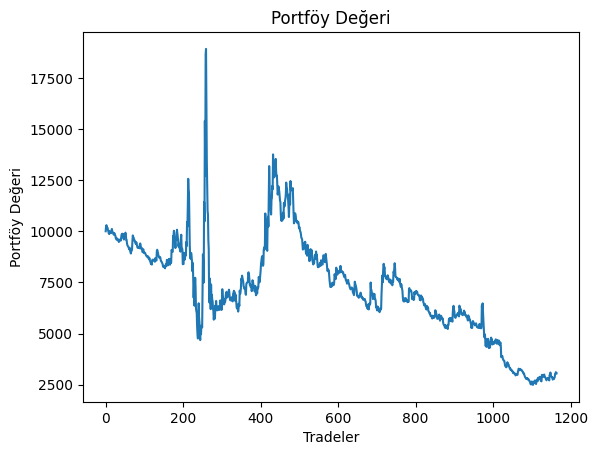

In [632]:
percentage_changes5_short = []

for i in range(0, len(combined_data5short)):

    if combined_data5short['Action'].iloc[i] == 'Sell' and combined_data5short['Action'].iloc[i+1] == 'Buy':
        sell_price = combined_data5short['Adj Close'].iloc[i]
        buy_price = combined_data5short['Adj Close'].iloc[i+1]
        percentage_change = ((sell_price - buy_price) / buy_price) * 100
        percentage_changes5_short.append(percentage_change)

print(percentage_changes5_short)

portfolio_value5_short = [initial_money]

for change in percentage_changes5_short:
    portfolio_value5_short.append(portfolio_value5_short[-1] * (1 + change / 100))


plt.plot(portfolio_value5_short)
plt.xlabel('Tradeler')
plt.ylabel('Portföy Değeri')
plt.title('Portföy Değeri')
plt.show()

In [633]:
differences5_short = [portfolio_value5_short[i] - portfolio_value5_short[i-1] for i in range(1, len(portfolio_value5_short))]
maximum_negative_difference5s = min(differences5_short)
maximum_positive_difference5s = max(differences5_short)


maximum_loss_in_a_trade_strat5_short = maximum_negative_difference5s

maximum_profit_in_a_trade_strat5_short = maximum_positive_difference5s

portfolio_max_value_strat5_short = max(portfolio_value5_short)

portfolio_minimum_value_strat5_short = min(portfolio_value5_short)

df5s = combined_data5short.copy()
df5s['Date'] = pd.to_datetime(df5s['Date'])
df5s['Trade_Number'] = df5s['Action'].eq('Buy').cumsum()
trade_durations5s = df5s.groupby('Trade_Number')['Date'].apply(lambda x: x.iloc[-1] - x.iloc[0]).dt.days

average_trade_duration5s = trade_durations5s.mean()
average_trade_duration_strat5_short = average_trade_duration5s

trade_profits5s = np.diff(portfolio_value5_short)  

average_trade_profit5s= np.mean(trade_profits5)

average_trade_profit_strat5_short = average_trade_profit5s

average_trades_per_year_strat5_short = len(portfolio_value5_short)/17

number_of_trades5s = len(portfolio_value5_short)-1
final_value5s = portfolio_value5_short[-1]
annualized_return5s = ((final_value5s / initial_money) ** (1 / number_of_trades5s)) - 1
annualized_return5s*= 100

annualized_return_strat5_short = annualized_return5s

portfolio_final_value_strat5_short = final_value5s

summary_of_strategies.loc['Strateji5 - Short Durum'] = [

    annualized_return_strat5_short,
    average_trades_per_year_strat5_short,
    average_trade_profit_strat5_short,
    average_trade_duration_strat5_short,
    maximum_loss_in_a_trade_strat5_short,
    maximum_profit_in_a_trade_strat5_short,
    portfolio_max_value_strat5_short,
    portfolio_minimum_value_strat5_short,
    portfolio_final_value_strat5_short
]

summary_of_strategies

,Stratejinin yıllık getirisi,Bir yılda ortalama işlem sayısı,Ortalama işlem karı,Ortalama işlem uzunluğu,Bir işlemdeki maksimum zarar,Bir işlemdeki maksimum kar,Portföy (kapital) maksimum değeri,Portföy (kapital) minimum değeri,Portföy (kapital) son değeri
Strateji1 - İşlemler için komisyon alınmadığı durum,0.315317,0.117647,549.776159,6570.000000,0.000000,549.776159,15371.202019,837.484005,10549.776159
Strateji1 - İşlemler için komisyon alındığı durum,0.314198,0.117647,547.776159,6570.000000,0.000000,547.776159,15370.202019,836.484005,10547.776159
Strateji2 - İşlemler için komisyon alınmadığı durum,-1.395171,12.235294,0.680807,26.938679,-3375.745026,1372.910344,12725.637022,885.823879,7875.336492
Strateji2 - İşlemler için komisyon alındığı durum,-1.548038,12.235294,0.655426,26.938679,-3377.745026,1370.910344,12683.637022,842.823879,7670.336492
Strateji3 - İşlemler için komisyon alınmadığı durum,0.737790,1.882353,78.298550,176.235294,-5705.412889,5830.400033,14731.666626,3609.128621,11331.075343
Strateji3 - İşlemler için komisyon alındığı durum,0.718935,1.882353,77.298550,176.235294,-5707.412889,5828.400033,14699.666626,3601.128621,11295.075343
Strateji4 - İşlemler için komisyon alınmadığı durum,-0.035771,87.882353,-2.771870,1.456798,-3837.578942,2315.743403,14632.760908,4694.039651,5861.597484
Strateji4 - İşlemler için komisyon alındığı durum,-0.083490,87.882353,-3.771870,1.456798,-3839.578942,2313.743403,14030.760908,4044.039651,2873.597484
Strateji5 - Long Durum,0.101888,68.529412,19.518155,2.920962,-4832.218575,3870.413277,40230.028388,5286.568955,32719.131976
Strateji5 - Short Durum,-0.101784,68.529412,19.518155,2.715021,-2925.652723,5926.440889,18915.860334,2485.705430,3056.315799


# Strategy 6

In [634]:
df6 = data.copy()
df6['Date'] = pd.to_datetime(df6['Date'])


df6['MA200'] = df6['Adj Close'].rolling(window=200).mean()
df6['MA50'] = df6['Adj Close'].rolling(window=50).mean()


df6['Signal'] = 0

for i in range(200, len(df6)):
    if df6.at[i, 'MA200'] < df6.at[i, 'MA50'] and df6.at[i - 1, 'MA200'] >= df6.at[i - 1, 'MA50']:
        df6.at[i, 'Signal'] = 1
    elif df6.at[i, 'MA200'] > df6.at[i, 'MA50'] and df6.at[i - 1, 'MA200'] <= df6.at[i - 1, 'MA50']:
        df6.at[i, 'Signal'] = -1


trading_signals = df6.loc[df6['Signal'] != 0]
trading_signals['Signal'] = trading_signals['Signal'].apply(lambda x: 'Buy' if x == 1 else 'Sell' if x == -1 else '')
trading_signals = trading_signals.drop(trading_signals.index[-1])
trading_signals

C:\Users\oguzd\AppData\Local\Temp\ipykernel_2020\614120974.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trading_signals['Signal'] = trading_signals['Signal'].apply(lambda x: 'Buy' if x == 1 else 'Sell' if x == -1 else '')


,Date,Open,High,Low,Close,Adj Close,Volume,MA200,MA50,Signal
236,2005-12-08,45.840000,46.029999,45.560001,45.779999,31.792845,10978000,30.319916,30.330153,Buy
573,2007-04-16,50.799999,51.680000,50.750000,51.230000,37.533318,18774400,37.680286,37.652002,Sell
697,2007-10-10,52.200001,52.480000,51.980000,52.299999,39.232605,15382700,37.439783,37.464687,Buy
718,2007-11-08,43.349998,44.410000,42.020000,43.500000,32.631344,48097300,37.137026,37.080689,Sell
1142,2009-07-17,13.250000,13.470000,12.760000,12.890000,10.648006,457023600,10.086369,10.094475,Buy
1381,2010-06-29,15.010000,15.050000,14.450000,14.570000,12.065837,201991800,13.544301,13.514753,Sell
1542,2011-02-16,14.810000,14.880000,14.700000,14.840000,12.310544,132821900,11.397995,11.461913,Buy
1603,2011-05-16,11.890000,12.110000,11.820000,11.860000,9.845549,123646400,10.911842,10.904816,Sell
1814,2012-03-16,9.410000,9.800000,9.330000,9.800000,8.178569,582294100,6.324403,6.389157,Buy
2376,2014-06-12,15.570000,15.660000,15.380000,15.420000,12.961671,66173200,13.070812,13.036481,Sell


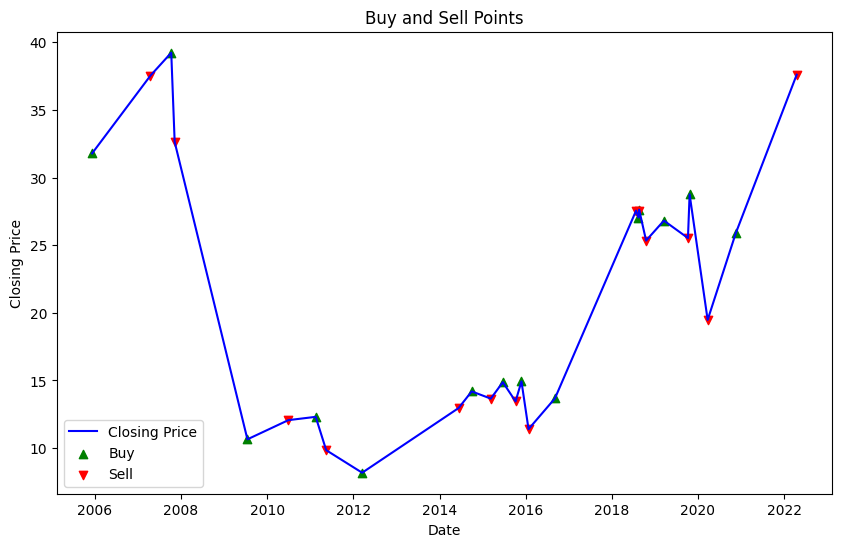

In [635]:
plt.figure(figsize=(10, 6))

plt.plot(trading_signals["Date"], trading_signals["Adj Close"], label="Closing Price", color="blue")

buys = trading_signals[trading_signals["Signal"] == "Buy"]
plt.scatter(buys["Date"], buys["Adj Close"], marker="^", color="green", label="Buy")

sells = trading_signals[trading_signals["Signal"] == "Sell"]
plt.scatter(sells["Date"], sells["Adj Close"], marker="v", color="red", label="Sell")


plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Buy and Sell Points")
plt.legend()

[18.055864456295122, -16.82595636970831, 13.315460190386815, -20.02344494280675, 58.483360597679145, -3.7603700833115963, -9.555188980054659, -23.641460695244717, 101.47793440878674, 1.6798220421153223, -8.262749073753533, -4.80432416469322, -32.27330007215211, 45.33405097910378]


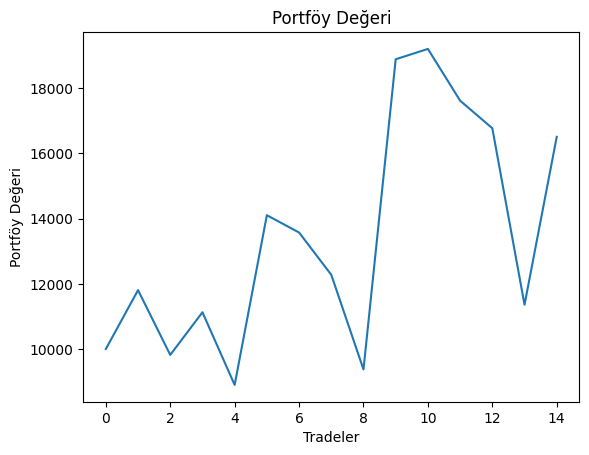

In [636]:
percentage_changes6_long = []

for i in range(0, len(trading_signals)-1):

    if trading_signals['Signal'].iloc[i] == 'Buy' and trading_signals['Signal'].iloc[i+1] == 'Sell':
        buy_price = trading_signals['Adj Close'].iloc[i]
        sell_price = trading_signals['Adj Close'].iloc[i+1]
        percentage_change = ((sell_price - buy_price) / buy_price) * 100
        percentage_changes6_long.append(percentage_change)

print(percentage_changes6_long)

portfolio_value6_long = [initial_money]

for change in percentage_changes6_long:
    portfolio_value6_long.append(portfolio_value6_long[-1] * (1 + change / 100))


plt.plot(portfolio_value6_long)
plt.xlabel('Tradeler')
plt.ylabel('Portföy Değeri')
plt.title('Portföy Değeri')
plt.show()

In [637]:
differences6 = [portfolio_value6_long[i] - portfolio_value6_long[i-1] for i in range(1, len(portfolio_value6_long))]
maximum_negative_difference6 = min(differences6)
maximum_positive_difference6 = max(differences6)


maximum_loss_in_a_trade_strat6 = maximum_negative_difference6

maximum_profit_in_a_trade_strat6 = maximum_positive_difference6

portfolio_max_value_strat6 = max(portfolio_value6_long)

portfolio_minimum_value_strat6 = min(portfolio_value6_long)

df6 = trading_signals.copy()
df6['Date'] = pd.to_datetime(df6['Date'])
df6['Trade_Number'] = df6['Signal'].eq('Buy').cumsum()
trade_durations6 = df6.groupby('Trade_Number')['Date'].apply(lambda x: x.iloc[-1] - x.iloc[0]).dt.days

average_trade_duration_strat6 = trade_durations6.mean()

trade_profits6 = np.diff(portfolio_value6_long)  

average_trade_profit_strat6 = np.mean(trade_profits6)

average_trades_per_year_strat6 = len(trading_signals)/17

number_of_trades6 = len(trading_signals)

final_value6 = portfolio_value6_long[-1]
annualized_return6 = ((final_value6 / initial_money) ** (1 / number_of_trades6)) - 1
annualized_return6 *= 100

annualized_return_strat6 = annualized_return6

portfolio_final_value_strat6 = final_value6

summary_of_strategies.loc['Strateji6 - Long Durum'] = [

    annualized_return_strat6,
    average_trades_per_year_strat6,
    average_trade_profit_strat6,
    average_trade_duration_strat6,
    maximum_loss_in_a_trade_strat6,
    maximum_profit_in_a_trade_strat6,
    portfolio_max_value_strat6,
    portfolio_minimum_value_strat6,
    portfolio_final_value_strat6
]

summary_of_strategies

,Stratejinin yıllık getirisi,Bir yılda ortalama işlem sayısı,Ortalama işlem karı,Ortalama işlem uzunluğu,Bir işlemdeki maksimum zarar,Bir işlemdeki maksimum kar,Portföy (kapital) maksimum değeri,Portföy (kapital) minimum değeri,Portföy (kapital) son değeri
Strateji1 - İşlemler için komisyon alınmadığı durum,0.315317,0.117647,549.776159,6570.000000,0.000000,549.776159,15371.202019,837.484005,10549.776159
Strateji1 - İşlemler için komisyon alındığı durum,0.314198,0.117647,547.776159,6570.000000,0.000000,547.776159,15370.202019,836.484005,10547.776159
Strateji2 - İşlemler için komisyon alınmadığı durum,-1.395171,12.235294,0.680807,26.938679,-3375.745026,1372.910344,12725.637022,885.823879,7875.336492
Strateji2 - İşlemler için komisyon alındığı durum,-1.548038,12.235294,0.655426,26.938679,-3377.745026,1370.910344,12683.637022,842.823879,7670.336492
Strateji3 - İşlemler için komisyon alınmadığı durum,0.737790,1.882353,78.298550,176.235294,-5705.412889,5830.400033,14731.666626,3609.128621,11331.075343
Strateji3 - İşlemler için komisyon alındığı durum,0.718935,1.882353,77.298550,176.235294,-5707.412889,5828.400033,14699.666626,3601.128621,11295.075343
Strateji4 - İşlemler için komisyon alınmadığı durum,-0.035771,87.882353,-2.771870,1.456798,-3837.578942,2315.743403,14632.760908,4694.039651,5861.597484
Strateji4 - İşlemler için komisyon alındığı durum,-0.083490,87.882353,-3.771870,1.456798,-3839.578942,2313.743403,14030.760908,4044.039651,2873.597484
Strateji5 - Long Durum,0.101888,68.529412,19.518155,2.920962,-4832.218575,3870.413277,40230.028388,5286.568955,32719.131976
Strateji5 - Short Durum,-0.101784,68.529412,19.518155,2.715021,-2925.652723,5926.440889,18915.860334,2485.705430,3056.315799


In [638]:
trading_signals_short = trading_signals.copy()
trading_signals_short['Signal'] = trading_signals_short['Signal'].map({'Buy': 'Sell', 'Sell': 'Buy'})
trading_signals_short

,Date,Open,High,Low,Close,Adj Close,Volume,MA200,MA50,Signal
236,2005-12-08,45.840000,46.029999,45.560001,45.779999,31.792845,10978000,30.319916,30.330153,Sell
573,2007-04-16,50.799999,51.680000,50.750000,51.230000,37.533318,18774400,37.680286,37.652002,Buy
697,2007-10-10,52.200001,52.480000,51.980000,52.299999,39.232605,15382700,37.439783,37.464687,Sell
718,2007-11-08,43.349998,44.410000,42.020000,43.500000,32.631344,48097300,37.137026,37.080689,Buy
1142,2009-07-17,13.250000,13.470000,12.760000,12.890000,10.648006,457023600,10.086369,10.094475,Sell
1381,2010-06-29,15.010000,15.050000,14.450000,14.570000,12.065837,201991800,13.544301,13.514753,Buy
1542,2011-02-16,14.810000,14.880000,14.700000,14.840000,12.310544,132821900,11.397995,11.461913,Sell
1603,2011-05-16,11.890000,12.110000,11.820000,11.860000,9.845549,123646400,10.911842,10.904816,Buy
1814,2012-03-16,9.410000,9.800000,9.330000,9.800000,8.178569,582294100,6.324403,6.389157,Sell
2376,2014-06-12,15.570000,15.660000,15.380000,15.420000,12.961671,66173200,13.070812,13.036481,Buy


[-15.294339285431683, 20.229816461130138, -11.750788610852274, 25.036643461933917, -36.90189328212389, 3.9072989854250584, 10.564662441439014, 30.96112224055133, -50.36677326803145, -1.6520702026991625, 9.006972620529574, 5.04678823122695, 47.65225547167398, -31.193000314580054]


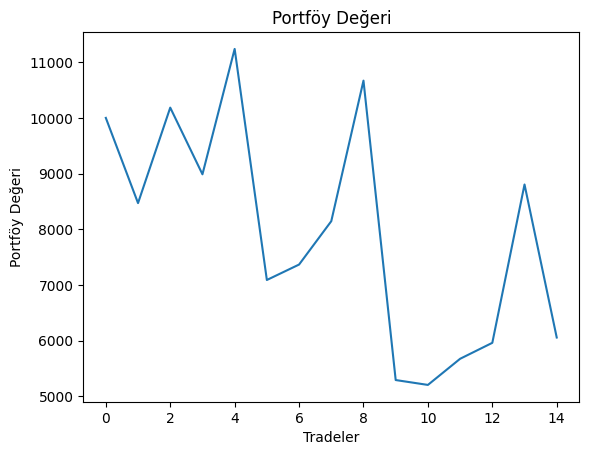

In [639]:
percentage_changes6_short = []

for i in range(0, len(trading_signals_short)):

    if trading_signals_short['Signal'].iloc[i] == 'Sell' and trading_signals_short['Signal'].iloc[i+1] == 'Buy':
        sell_price = trading_signals_short['Adj Close'].iloc[i]
        buy_price = trading_signals_short['Adj Close'].iloc[i+1]
        percentage_change = ((sell_price - buy_price) / buy_price) * 100
        percentage_changes6_short.append(percentage_change)

print(percentage_changes6_short)

portfolio_value6_short = [initial_money]

for change in percentage_changes6_short:
    portfolio_value6_short.append(portfolio_value6_short[-1] * (1 + change / 100))


plt.plot(portfolio_value6_short)
plt.xlabel('Tradeler')
plt.ylabel('Portföy Değeri')
plt.title('Portföy Değeri')
plt.show()

In [640]:
differences6_short = [portfolio_value6_short[i] - portfolio_value6_short[i-1] for i in range(1, len(portfolio_value6_short))]
maximum_negative_difference6s = min(differences6_short)
maximum_positive_difference6s = max(differences6_short)


maximum_loss_in_a_trade_strat6_short = maximum_negative_difference6s

maximum_profit_in_a_trade_strat6_short = maximum_positive_difference6s

portfolio_max_value_strat6_short = max(portfolio_value6_short)

portfolio_minimum_value_strat6_short = min(portfolio_value6_short)

df6s = trading_signals_short.copy()
df6s['Date'] = pd.to_datetime(df6s['Date'])
df6s['Trade_Number'] = df6s['Signal'].eq('Buy').cumsum()
trade_durations6s = df6s.groupby('Trade_Number')['Date'].apply(lambda x: x.iloc[-1] - x.iloc[0]).dt.days

average_trade_duration_strat6_short = trade_durations6s.mean()

trade_profits6s = np.diff(portfolio_value6_short)  

average_trade_profit6s= np.mean(trade_profits6s)

average_trade_profit_strat6_short = average_trade_profit6s

average_trades_per_year_strat6_short = len(trading_signals_short)/17

number_of_trades6s = len(trading_signals_short)-1
final_value6s = portfolio_value6_short[-1]
annualized_return6s = ((final_value6s / initial_money) ** (1 / number_of_trades6s)) - 1
annualized_return6s*= 100

annualized_return_strat6_short = annualized_return6s
portfolio_final_value_strat6_short = final_value6s


summary_of_strategies.loc['Strateji6 - Short Durum'] = [

    annualized_return_strat6_short,
    average_trades_per_year_strat6_short,
    average_trade_profit_strat6_short,
    average_trade_duration_strat6_short,
    maximum_loss_in_a_trade_strat6_short,
    maximum_profit_in_a_trade_strat6_short,
    portfolio_max_value_strat6_short,
    portfolio_minimum_value_strat6_short,
    portfolio_final_value_strat6_short
]

summary_of_strategies

,Stratejinin yıllık getirisi,Bir yılda ortalama işlem sayısı,Ortalama işlem karı,Ortalama işlem uzunluğu,Bir işlemdeki maksimum zarar,Bir işlemdeki maksimum kar,Portföy (kapital) maksimum değeri,Portföy (kapital) minimum değeri,Portföy (kapital) son değeri
Strateji1 - İşlemler için komisyon alınmadığı durum,0.315317,0.117647,549.776159,6570.000000,0.000000,549.776159,15371.202019,837.484005,10549.776159
Strateji1 - İşlemler için komisyon alındığı durum,0.314198,0.117647,547.776159,6570.000000,0.000000,547.776159,15370.202019,836.484005,10547.776159
Strateji2 - İşlemler için komisyon alınmadığı durum,-1.395171,12.235294,0.680807,26.938679,-3375.745026,1372.910344,12725.637022,885.823879,7875.336492
Strateji2 - İşlemler için komisyon alındığı durum,-1.548038,12.235294,0.655426,26.938679,-3377.745026,1370.910344,12683.637022,842.823879,7670.336492
Strateji3 - İşlemler için komisyon alınmadığı durum,0.737790,1.882353,78.298550,176.235294,-5705.412889,5830.400033,14731.666626,3609.128621,11331.075343
Strateji3 - İşlemler için komisyon alındığı durum,0.718935,1.882353,77.298550,176.235294,-5707.412889,5828.400033,14699.666626,3601.128621,11295.075343
Strateji4 - İşlemler için komisyon alınmadığı durum,-0.035771,87.882353,-2.771870,1.456798,-3837.578942,2315.743403,14632.760908,4694.039651,5861.597484
Strateji4 - İşlemler için komisyon alındığı durum,-0.083490,87.882353,-3.771870,1.456798,-3839.578942,2313.743403,14030.760908,4044.039651,2873.597484
Strateji5 - Long Durum,0.101888,68.529412,19.518155,2.920962,-4832.218575,3870.413277,40230.028388,5286.568955,32719.131976
Strateji5 - Short Durum,-0.101784,68.529412,19.518155,2.715021,-2925.652723,5926.440889,18915.860334,2485.705430,3056.315799


# Strategy 7

In [641]:
df7 = data.copy()
df7['Date'] = pd.to_datetime(df7['Date'])


df7['MA50'] = df7['Adj Close'].rolling(window=50).mean()
df7['MA20'] = df7['Adj Close'].rolling(window=20).mean()


df7['Signal'] = 0

for i in range(200, len(df7)):
    if df7.at[i, 'MA50'] < df7.at[i, 'MA20'] and df7.at[i - 1, 'MA50'] >= df7.at[i - 1, 'MA20']:
        df7.at[i, 'Signal'] = 1
    elif df7.at[i, 'MA50'] > df7.at[i, 'MA20'] and df7.at[i - 1, 'MA50'] <= df7.at[i - 1, 'MA20']:
        df7.at[i, 'Signal'] = -1


trading_signals7 = df7.loc[df7['Signal'] != 0]
trading_signals7['Signal'] = trading_signals7['Signal'].apply(lambda x: 'Buy' if x == 1 else 'Sell' if x == -1 else '')
trading_signals7

C:\Users\oguzd\AppData\Local\Temp\ipykernel_2020\3381753388.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trading_signals7['Signal'] = trading_signals7['Signal'].apply(lambda x: 'Buy' if x == 1 else 'Sell' if x == -1 else '')


,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA20,Signal
211,2005-11-02,43.779999,44.139999,43.650002,44.080002,30.285049,11795200,29.280217,29.312541,Buy
266,2006-01-24,44.080002,44.680000,44.040001,44.240002,30.723364,13500300,31.880696,31.861952,Sell
297,2006-03-09,45.700001,45.810001,45.490002,45.549999,31.981899,11922800,31.363757,31.369444,Buy
372,2006-06-26,47.349998,47.529999,47.160000,47.459999,33.668629,8859800,34.073208,34.047806,Sell
388,2006-07-19,48.980000,49.980000,48.849998,49.950001,35.435055,24176600,34.284963,34.288295,Buy
...,...,...,...,...,...,...,...,...,...,...
4321,2022-03-03,43.090000,43.500000,42.209999,42.490002,41.129112,48733800,44.580288,44.563269,Sell
4431,2022-08-10,34.500000,35.430000,34.450001,35.070000,34.142281,61415800,32.251597,32.426894,Buy
4462,2022-09-23,31.930000,32.090000,31.209999,31.730000,31.094170,55316100,33.264444,33.116428,Sell
4489,2022-11-01,36.439999,36.759998,36.110001,36.200001,35.474598,29913200,32.644292,32.795872,Buy


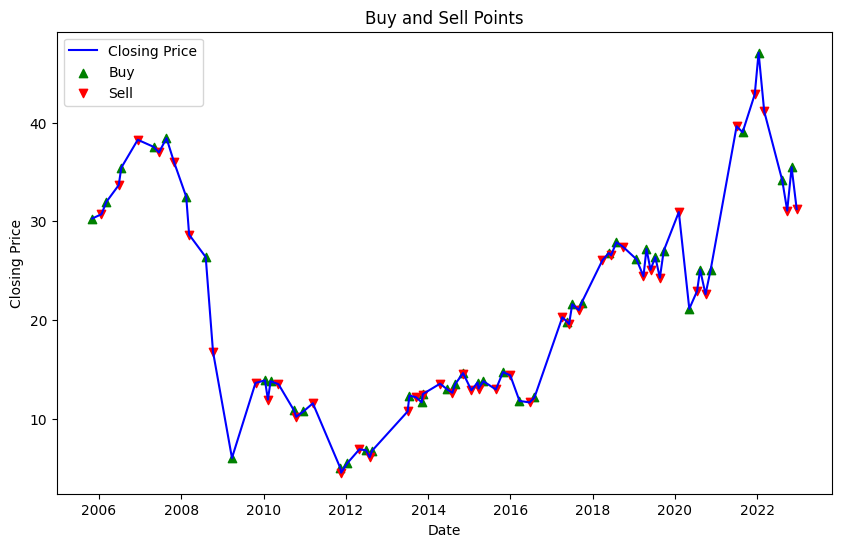

In [642]:
plt.figure(figsize=(10, 6))

plt.plot(trading_signals7["Date"], trading_signals7["Adj Close"], label="Closing Price", color="blue")

buys = trading_signals7[trading_signals7["Signal"] == "Buy"]
plt.scatter(buys["Date"], buys["Adj Close"], marker="^", color="green", label="Buy")

sells = trading_signals7[trading_signals7["Signal"] == "Sell"]
plt.scatter(sells["Date"], sells["Adj Close"], marker="v", color="red", label="Sell")


plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Buy and Sell Points")
plt.legend()

[1.4472983022084571, 5.274014529281092, 7.96409657047238, -1.4990467935715246, -6.306334278811271, -11.823519276705078, -36.360137237663466, 125.4023880075688, -13.971452407572754, -2.1556727220368743, -5.873377408060714, 7.6273120211494145, -9.256173617110559, 25.873676052465118, -10.268971224527615, 58.03976528161875, -1.4223627631539504, 6.245486197748275, 8.378445483010296, -2.5889704409529, 7.664614139164293, -11.839755457663797, -4.463741906928352, -6.041926734706406, -2.329995099261794, -1.2650131397991753, 66.4999862589978, -1.1275320560536621, -2.70584400265651, 19.65264121061042, -0.8211807236874086, -1.5705672223929668, -6.574957576431961, -7.715327358514805, -7.9255683096401, 14.510641852078567, 8.456931158828393, -9.889266437843263, 58.04924942424737, 9.834343978195676, -12.612054671996829, -8.927672407124758, -11.918982140403681]


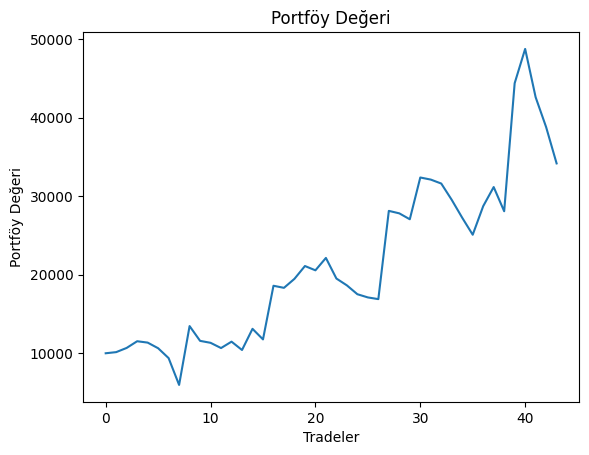

In [643]:
percentage_changes7_long = []

for i in range(0, len(trading_signals7)-1):

    if trading_signals7['Signal'].iloc[i] == 'Buy' and trading_signals7['Signal'].iloc[i+1] == 'Sell':
        buy_price = trading_signals7['Adj Close'].iloc[i]
        sell_price = trading_signals7['Adj Close'].iloc[i+1]
        percentage_change = ((sell_price - buy_price) / buy_price) * 100
        percentage_changes7_long.append(percentage_change)

print(percentage_changes7_long)

portfolio_value7_long = [initial_money]

for change in percentage_changes7_long:
    portfolio_value7_long.append(portfolio_value7_long[-1] * (1 + change / 100))


plt.plot(portfolio_value7_long)
plt.xlabel('Tradeler')
plt.ylabel('Portföy Değeri')
plt.title('Portföy Değeri')
plt.show()

In [644]:
differences7 = [portfolio_value7_long[i] - portfolio_value7_long[i-1] for i in range(1, len(portfolio_value7_long))]
maximum_negative_difference7 = min(differences7)
maximum_positive_difference7 = max(differences7)


maximum_loss_in_a_trade_strat7 = maximum_negative_difference7

maximum_profit_in_a_trade_strat7 = maximum_positive_difference7

portfolio_max_value_strat7 = max(portfolio_value7_long)

portfolio_minimum_value_strat7 = min(portfolio_value7_long)

df7 = trading_signals7.copy()
df7['Date'] = pd.to_datetime(df7['Date'])
df7['Trade_Number'] = df7['Signal'].eq('Buy').cumsum()
trade_durations7 = df7.groupby('Trade_Number')['Date'].apply(lambda x: x.iloc[-1] - x.iloc[0]).dt.days

average_trade_duration_strat7 = trade_durations7.mean()

trade_profits7 = np.diff(portfolio_value7_long)  

average_trade_profit_strat7 = np.mean(trade_profits7)

average_trades_per_year_strat7 = len(trading_signals7)/17

number_of_trades7 = len(trading_signals7)-1

final_value7 = portfolio_value7_long[-1]
annualized_return7 = ((final_value7 / initial_money) ** (1 / number_of_trades7)) - 1
annualized_return7 *= 100

annualized_return_strat7 = annualized_return7

portfolio_final_value_strat7 = final_value7

summary_of_strategies.loc['Strateji7 - Long Durum'] = [

    annualized_return_strat7,
    average_trades_per_year_strat7,
    average_trade_profit_strat7,
    average_trade_duration_strat7,
    maximum_loss_in_a_trade_strat7,
    maximum_profit_in_a_trade_strat7,
    portfolio_max_value_strat7,
    portfolio_minimum_value_strat7,
    portfolio_final_value_strat7
]

summary_of_strategies

,Stratejinin yıllık getirisi,Bir yılda ortalama işlem sayısı,Ortalama işlem karı,Ortalama işlem uzunluğu,Bir işlemdeki maksimum zarar,Bir işlemdeki maksimum kar,Portföy (kapital) maksimum değeri,Portföy (kapital) minimum değeri,Portföy (kapital) son değeri
Strateji1 - İşlemler için komisyon alınmadığı durum,0.315317,0.117647,549.776159,6570.000000,0.000000,549.776159,15371.202019,837.484005,10549.776159
Strateji1 - İşlemler için komisyon alındığı durum,0.314198,0.117647,547.776159,6570.000000,0.000000,547.776159,15370.202019,836.484005,10547.776159
Strateji2 - İşlemler için komisyon alınmadığı durum,-1.395171,12.235294,0.680807,26.938679,-3375.745026,1372.910344,12725.637022,885.823879,7875.336492
Strateji2 - İşlemler için komisyon alındığı durum,-1.548038,12.235294,0.655426,26.938679,-3377.745026,1370.910344,12683.637022,842.823879,7670.336492
Strateji3 - İşlemler için komisyon alınmadığı durum,0.737790,1.882353,78.298550,176.235294,-5705.412889,5830.400033,14731.666626,3609.128621,11331.075343
Strateji3 - İşlemler için komisyon alındığı durum,0.718935,1.882353,77.298550,176.235294,-5707.412889,5828.400033,14699.666626,3601.128621,11295.075343
Strateji4 - İşlemler için komisyon alınmadığı durum,-0.035771,87.882353,-2.771870,1.456798,-3837.578942,2315.743403,14632.760908,4694.039651,5861.597484
Strateji4 - İşlemler için komisyon alındığı durum,-0.083490,87.882353,-3.771870,1.456798,-3839.578942,2313.743403,14030.760908,4044.039651,2873.597484
Strateji5 - Long Durum,0.101888,68.529412,19.518155,2.920962,-4832.218575,3870.413277,40230.028388,5286.568955,32719.131976
Strateji5 - Short Durum,-0.101784,68.529412,19.518155,2.715021,-2925.652723,5926.440889,18915.860334,2485.705430,3056.315799


In [645]:
trading_signals7_short = trading_signals7.copy()
trading_signals7_short['Signal'] = trading_signals7_short['Signal'].map({'Buy': 'Sell', 'Sell': 'Buy'})
trading_signals7_short

,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA20,Signal
211,2005-11-02,43.779999,44.139999,43.650002,44.080002,30.285049,11795200,29.280217,29.312541,Sell
266,2006-01-24,44.080002,44.680000,44.040001,44.240002,30.723364,13500300,31.880696,31.861952,Buy
297,2006-03-09,45.700001,45.810001,45.490002,45.549999,31.981899,11922800,31.363757,31.369444,Sell
372,2006-06-26,47.349998,47.529999,47.160000,47.459999,33.668629,8859800,34.073208,34.047806,Buy
388,2006-07-19,48.980000,49.980000,48.849998,49.950001,35.435055,24176600,34.284963,34.288295,Sell
...,...,...,...,...,...,...,...,...,...,...
4321,2022-03-03,43.090000,43.500000,42.209999,42.490002,41.129112,48733800,44.580288,44.563269,Buy
4431,2022-08-10,34.500000,35.430000,34.450001,35.070000,34.142281,61415800,32.251597,32.426894,Sell
4462,2022-09-23,31.930000,32.090000,31.209999,31.730000,31.094170,55316100,33.264444,33.116428,Buy
4489,2022-11-01,36.439999,36.759998,36.110001,36.200001,35.474598,29913200,32.644292,32.795872,Sell


[-1.4266504149740873, -5.0097971022223815, -7.376615767144315, 1.521860189951636, 6.730801095537775, 13.40892625756777, 57.13421691911974, -55.63489771162402, 16.240483884215433, 2.203165765464242, 6.239868430766039, -7.086781113376316, 10.200334266327447, -20.555271653209502, 11.444169719956, -36.72478580197514, 1.4428858339711799, -5.878354385920857, -7.730730447064517, 2.6577795683635173, -7.118972375879437, 13.429812404817143, 4.672301381722281, 6.430449800355989, 2.3855789724079184, 1.2812207506446638, -39.939934983270355, 1.140390322504029, 2.7810961253730286, -16.42474500501681, 0.8279799353121918, 1.5956276268923855, 7.037682195125574, 8.360356208324994, 8.607784120018522, -12.671871904117857, -7.797501799533444, 10.974571004931203, -36.728582790309446, -8.95379680161607, 14.432259077220044, 9.802837638052402, 13.531839697178436]


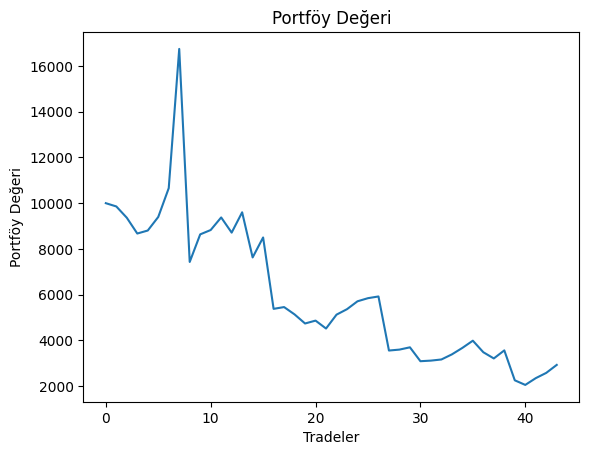

In [646]:
percentage_changes7_short = []
for i in range(0, len(trading_signals7_short)):

    if trading_signals7_short['Signal'].iloc[i] == 'Sell' and trading_signals7_short['Signal'].iloc[i+1] == 'Buy':
        sell_price = trading_signals7_short['Adj Close'].iloc[i]
        buy_price = trading_signals7_short['Adj Close'].iloc[i+1]
        percentage_change = ((sell_price - buy_price) / buy_price) * 100
        percentage_changes7_short.append(percentage_change)

print(percentage_changes7_short)

portfolio_value7_short = [initial_money]

for change in percentage_changes7_short:
    portfolio_value7_short.append(portfolio_value7_short[-1] * (1 + change / 100))


plt.plot(portfolio_value7_short)
plt.xlabel('Tradeler')
plt.ylabel('Portföy Değeri')
plt.title('Portföy Değeri')
plt.show()

In [647]:
differences7_short = [portfolio_value7_short[i] - portfolio_value7_short[i-1] for i in range(1, len(portfolio_value7_short))]
maximum_negative_difference7s = min(differences7_short)
maximum_positive_difference7s = max(differences7_short)


maximum_loss_in_a_trade_strat7_short = maximum_negative_difference7s

maximum_profit_in_a_trade_strat7_short = maximum_positive_difference7s

portfolio_max_value_strat7_short = max(portfolio_value7_short)

portfolio_minimum_value_strat7_short = min(portfolio_value7_short)

df7s = trading_signals7_short.copy()
df7s['Date'] = pd.to_datetime(df7s['Date'])
df7s['Trade_Number'] = df7s['Signal'].eq('Buy').cumsum()
trade_durations7s = df7s.groupby('Trade_Number')['Date'].apply(lambda x: x.iloc[-1] - x.iloc[0]).dt.days

average_trade_duration_strat7_short = trade_durations7s.mean()

trade_profits7s = np.diff(portfolio_value7_short)  

average_trade_profit7s= np.mean(trade_profits7s)

average_trade_profit_strat7_short = average_trade_profit7s

average_trades_per_year_strat7_short = len(trading_signals7_short)/17

number_of_trades7s = len(trading_signals7_short)-1
final_value7s = portfolio_value7_short[-1]
portfolio_final_value_strat7_short = final_value7s
annualized_return7s = ((final_value7s / initial_money) ** (1 / number_of_trades7s)) - 1
annualized_return7s*= 100

annualized_return_strat7_short = annualized_return7s



summary_of_strategies.loc['Strateji7 - Short Durum'] = [

    annualized_return_strat7_short,
    average_trades_per_year_strat7_short,
    average_trade_profit_strat7_short,
    average_trade_duration_strat7_short,
    maximum_loss_in_a_trade_strat7_short,
    maximum_profit_in_a_trade_strat7_short,
    portfolio_max_value_strat7_short,
    portfolio_minimum_value_strat7_short,
    portfolio_final_value_strat7_short
]

summary_of_strategies

,Stratejinin yıllık getirisi,Bir yılda ortalama işlem sayısı,Ortalama işlem karı,Ortalama işlem uzunluğu,Bir işlemdeki maksimum zarar,Bir işlemdeki maksimum kar,Portföy (kapital) maksimum değeri,Portföy (kapital) minimum değeri,Portföy (kapital) son değeri
Strateji1 - İşlemler için komisyon alınmadığı durum,0.315317,0.117647,549.776159,6570.000000,0.000000,549.776159,15371.202019,837.484005,10549.776159
Strateji1 - İşlemler için komisyon alındığı durum,0.314198,0.117647,547.776159,6570.000000,0.000000,547.776159,15370.202019,836.484005,10547.776159
Strateji2 - İşlemler için komisyon alınmadığı durum,-1.395171,12.235294,0.680807,26.938679,-3375.745026,1372.910344,12725.637022,885.823879,7875.336492
Strateji2 - İşlemler için komisyon alındığı durum,-1.548038,12.235294,0.655426,26.938679,-3377.745026,1370.910344,12683.637022,842.823879,7670.336492
Strateji3 - İşlemler için komisyon alınmadığı durum,0.737790,1.882353,78.298550,176.235294,-5705.412889,5830.400033,14731.666626,3609.128621,11331.075343
Strateji3 - İşlemler için komisyon alındığı durum,0.718935,1.882353,77.298550,176.235294,-5707.412889,5828.400033,14699.666626,3601.128621,11295.075343
Strateji4 - İşlemler için komisyon alınmadığı durum,-0.035771,87.882353,-2.771870,1.456798,-3837.578942,2315.743403,14632.760908,4694.039651,5861.597484
Strateji4 - İşlemler için komisyon alındığı durum,-0.083490,87.882353,-3.771870,1.456798,-3839.578942,2313.743403,14030.760908,4044.039651,2873.597484
Strateji5 - Long Durum,0.101888,68.529412,19.518155,2.920962,-4832.218575,3870.413277,40230.028388,5286.568955,32719.131976
Strateji5 - Short Durum,-0.101784,68.529412,19.518155,2.715021,-2925.652723,5926.440889,18915.860334,2485.705430,3056.315799


# Strategy 8

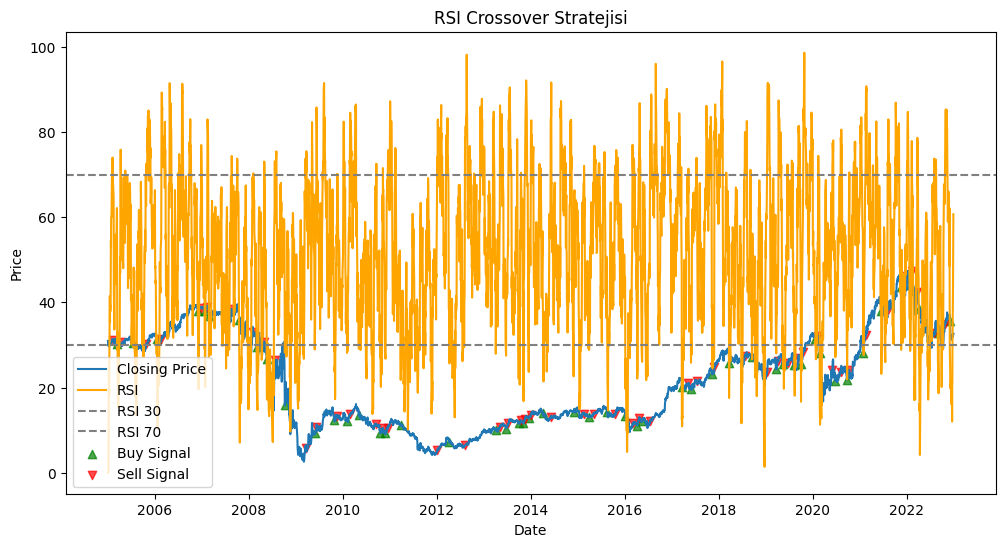

In [648]:
df8 = data.copy()
df8['Date'] = pd.to_datetime(df8['Date'])

def calculate_rsi(data, window):
    delta = data['Adj Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

rsi_window = 14

df8['RSI'] = calculate_rsi(df8, rsi_window)

df8['Signal'] = 0

last_action = None

for i in range(rsi_window, len(df8)):
    if df8.at[i, 'RSI'] < 30 and last_action != 1:
        df8.at[i, 'Signal'] = 1
        last_action = 1
    elif df8.at[i, 'RSI'] > 70 and last_action != -1:
        df8.at[i, 'Signal'] = -1
        last_action = -1


trading_signals8 = df8.loc[df8['Signal'] != 0]


plt.figure(figsize=(12, 6))
plt.plot(df8['Date'], df8['Adj Close'], label='Closing Price')


plt.plot(df8['Date'], df8['RSI'], label='RSI', color='orange')
plt.axhline(30, color='gray', linestyle='dashed', label='RSI 30')
plt.axhline(70, color='gray', linestyle='dashed', label='RSI 70')

buy_signals = trading_signals8[trading_signals8['Signal'] == 1]
sell_signals = trading_signals8[trading_signals8['Signal'] == -1]
plt.scatter(buy_signals['Date'], buy_signals['Adj Close'], c='g', marker='^', label='Buy Signal', alpha=0.7)
plt.scatter(sell_signals['Date'], sell_signals['Adj Close'], c='r', marker='v', label='Sell Signal', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('RSI Crossover Stratejisi')
plt.show()

In [649]:
trading_signals8['Signal'] = trading_signals8['Signal'].apply(lambda x: 'Buy' if x == 1 else 'Sell' if x == -1 else '')
trading_signals8 = trading_signals8.drop(index=[trading_signals8.index[0], trading_signals8.index[-1]])
trading_signals8

C:\Users\oguzd\AppData\Local\Temp\ipykernel_2020\2921759313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trading_signals8['Signal'] = trading_signals8['Signal'].apply(lambda x: 'Buy' if x == 1 else 'Sell' if x == -1 else '')


,Date,Open,High,Low,Close,Adj Close,Volume,RSI,Signal
51,2005-03-17,44.900002,45.160000,44.700001,44.779999,30.113655,7583800,28.850464,Buy
68,2005-04-12,44.900002,45.799999,44.650002,45.520000,30.611303,10269300,75.832524,Sell
137,2005-07-20,44.830002,44.980000,44.580002,44.860001,30.463406,13133300,29.459183,Buy
208,2005-10-28,43.430000,43.980000,43.230000,43.980000,30.216349,14087800,72.553419,Sell
261,2006-01-17,45.400002,45.580002,45.000000,45.310001,31.466459,14605900,27.793411,Buy
...,...,...,...,...,...,...,...,...,...
4337,2022-03-25,43.480000,44.259998,43.330002,43.730000,42.329391,38968100,78.639727,Sell
4345,2022-04-06,39.740002,40.009998,39.349998,39.700001,38.428471,54159800,27.285131,Buy
4426,2022-08-03,33.419998,33.750000,33.169998,33.639999,32.750111,30065800,73.748372,Sell
4446,2022-08-31,34.139999,34.369999,33.599998,33.610001,32.720905,44917600,29.824535,Buy


[1.6525659206761787, -0.8109959864632277, 0.1323917635600473, 1.7146147260492466, 2.7671513853811893, 4.305932296705062, -7.911594549549221, 4.32616850685998, -1.5446667007251473, -63.79365166480591, 15.185236550192336, 7.128579839854007, 12.20336154388355, -15.47946231361249, 10.651378036199512, 13.592891727950127, -52.61307004883562, -9.480210286576359, 7.769424483015322, 12.03254307903315, 6.014503417836628, 7.1069372875851355, 5.643080014250111, -7.160043526431161, -2.1566689072626297, 6.074426732710223, -3.158090401681282, -12.571821548121562, 15.916158322942506, 0.12633681234595118, 4.561220826067298, 9.861673744833093, 7.121228786097824, 5.847237603845775, -12.42611503060794, 7.626803085217185, 0.6115226812227478, 6.578099801280328, 11.422408659801725, 2.1395155465259954, -14.607132281465413, 10.021602977418818, 10.404140891112043, 15.581820847975344, 0.8794075224301231, 6.213624360050908, 7.434051889411586, -0.5796129891257512, -14.776440103484745, 6.918249968941874]


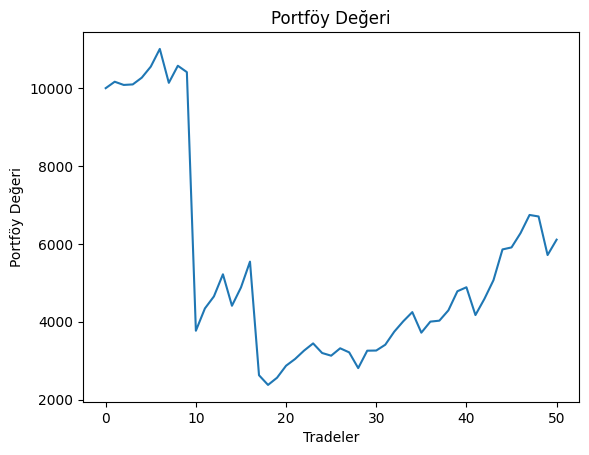

In [650]:
percentage_changes8_long = []

for i in range(0, len(trading_signals8)-1):

    if trading_signals8['Signal'].iloc[i] == 'Buy' and trading_signals8['Signal'].iloc[i+1] == 'Sell':
        buy_price = trading_signals8['Adj Close'].iloc[i]
        sell_price = trading_signals8['Adj Close'].iloc[i+1]
        percentage_change = ((sell_price - buy_price) / buy_price) * 100
        percentage_changes8_long.append(percentage_change)

print(percentage_changes8_long)

portfolio_value8_long = [initial_money]

for change in percentage_changes8_long:
    portfolio_value8_long.append(portfolio_value8_long[-1] * (1 + change / 100))


plt.plot(portfolio_value8_long)
plt.xlabel('Tradeler')
plt.ylabel('Portföy Değeri')
plt.title('Portföy Değeri')
plt.show()

In [651]:
differences8 = [portfolio_value8_long[i] - portfolio_value8_long[i-1] for i in range(1, len(portfolio_value8_long))]
maximum_negative_difference8 = min(differences8)
maximum_positive_difference8 = max(differences8)


maximum_loss_in_a_trade_strat8 = maximum_negative_difference8

maximum_profit_in_a_trade_strat8 = maximum_positive_difference8

portfolio_max_value_strat8 = max(portfolio_value8_long)

portfolio_minimum_value_strat8 = min(portfolio_value8_long)

df8 = trading_signals8.copy()
df8['Date'] = pd.to_datetime(df8['Date'])
df8['Trade_Number'] = df8['Signal'].eq('Buy').cumsum()
trade_durations8 = df8.groupby('Trade_Number')['Date'].apply(lambda x: x.iloc[-1] - x.iloc[0]).dt.days

average_trade_duration_strat8 = trade_durations8.mean()

trade_profits8 = np.diff(portfolio_value8_long)  

average_trade_profit_strat8 = np.mean(trade_profits8)

average_trades_per_year_strat8 = len(trading_signals8)/17

number_of_trades8 = len(trading_signals8)-1

final_value8 = portfolio_value8_long[-1]
annualized_return8 = ((final_value8 / initial_money) ** (1 / number_of_trades8)) - 1
annualized_return8 *= 100

annualized_return_strat8 = annualized_return8

portfolio_final_value_strat8 = final_value8

summary_of_strategies.loc['Strateji8'] = [

    annualized_return_strat8,
    average_trades_per_year_strat8,
    average_trade_profit_strat8,
    average_trade_duration_strat8,
    maximum_loss_in_a_trade_strat8,
    maximum_profit_in_a_trade_strat8,
    portfolio_max_value_strat8,
    portfolio_minimum_value_strat8,
    portfolio_final_value_strat8
]

summary_of_strategies

,Stratejinin yıllık getirisi,Bir yılda ortalama işlem sayısı,Ortalama işlem karı,Ortalama işlem uzunluğu,Bir işlemdeki maksimum zarar,Bir işlemdeki maksimum kar,Portföy (kapital) maksimum değeri,Portföy (kapital) minimum değeri,Portföy (kapital) son değeri
Strateji1 - İşlemler için komisyon alınmadığı durum,0.315317,0.117647,549.776159,6570.000000,0.000000,549.776159,15371.202019,837.484005,10549.776159
Strateji1 - İşlemler için komisyon alındığı durum,0.314198,0.117647,547.776159,6570.000000,0.000000,547.776159,15370.202019,836.484005,10547.776159
Strateji2 - İşlemler için komisyon alınmadığı durum,-1.395171,12.235294,0.680807,26.938679,-3375.745026,1372.910344,12725.637022,885.823879,7875.336492
Strateji2 - İşlemler için komisyon alındığı durum,-1.548038,12.235294,0.655426,26.938679,-3377.745026,1370.910344,12683.637022,842.823879,7670.336492
Strateji3 - İşlemler için komisyon alınmadığı durum,0.737790,1.882353,78.298550,176.235294,-5705.412889,5830.400033,14731.666626,3609.128621,11331.075343
Strateji3 - İşlemler için komisyon alındığı durum,0.718935,1.882353,77.298550,176.235294,-5707.412889,5828.400033,14699.666626,3601.128621,11295.075343
Strateji4 - İşlemler için komisyon alınmadığı durum,-0.035771,87.882353,-2.771870,1.456798,-3837.578942,2315.743403,14632.760908,4694.039651,5861.597484
Strateji4 - İşlemler için komisyon alındığı durum,-0.083490,87.882353,-3.771870,1.456798,-3839.578942,2313.743403,14030.760908,4044.039651,2873.597484
Strateji5 - Long Durum,0.101888,68.529412,19.518155,2.920962,-4832.218575,3870.413277,40230.028388,5286.568955,32719.131976
Strateji5 - Short Durum,-0.101784,68.529412,19.518155,2.715021,-2925.652723,5926.440889,18915.860334,2485.705430,3056.315799


# Strategy 9

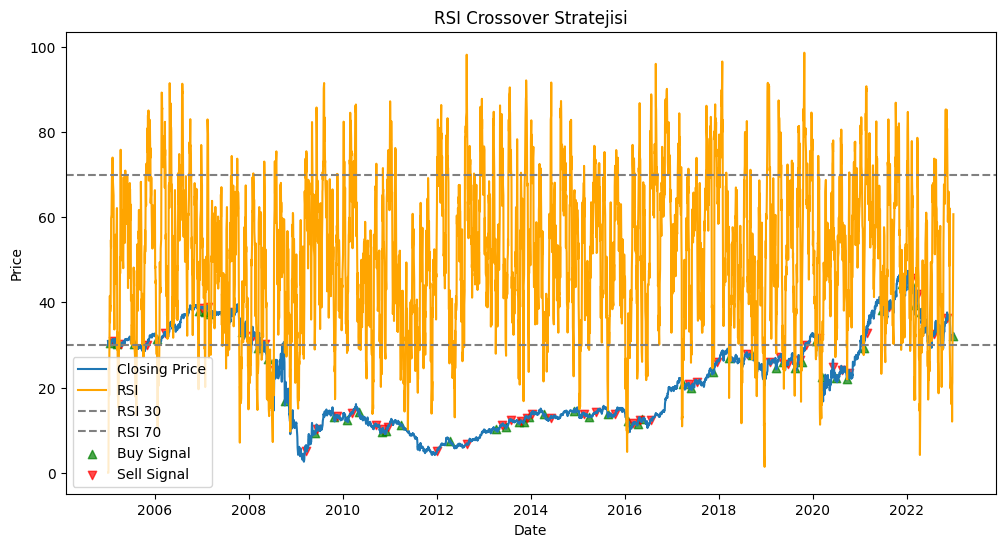

In [652]:
df9 = data.copy()
df9['Date'] = pd.to_datetime(df9['Date'])

rsi_window = 14


df9['RSI'] = calculate_rsi(df9, rsi_window)


df9['Signal'] = None

below_30 = False
above_70 = False


for i in range(1, len(df9)):
    if df9.at[i, 'RSI'] >= 30 and df9.at[i - 1, 'RSI'] < 30 and not below_30:
        df9.at[i, 'Signal'] = 'Buy'
        df9.at[i-1, 'Signal'] = 'Hold'
        below_30 = True
        above_70 = False
    elif df9.at[i, 'RSI'] < 70 and df9.at[i - 1, 'RSI'] >= 70 and not above_70:
        df9.at[i, 'Signal'] = 'Sell'
        df9.at[i-1, 'Signal'] = 'Hold'
        above_70 = True
        below_30 = False
    else:
        df9.at[i, 'Signal'] = None

trading_signals9 = df9.loc[df9['Signal'].notnull()]


plt.figure(figsize=(12, 6))
plt.plot(df9['Date'], df9['Adj Close'], label='Closing Price')


plt.plot(df9['Date'], df9['RSI'], label='RSI', color='orange')
plt.axhline(30, color='gray', linestyle='dashed', label='RSI 30')
plt.axhline(70, color='gray', linestyle='dashed', label='RSI 70')

buy_signals = trading_signals9[trading_signals9['Signal'] == "Buy"]
sell_signals = trading_signals9[trading_signals9['Signal'] == "Sell"]
plt.scatter(buy_signals['Date'], buy_signals['Adj Close'], c='g', marker='^', label='Buy Signal', alpha=0.7)
plt.scatter(sell_signals['Date'], sell_signals['Adj Close'], c='r', marker='v', label='Sell Signal', alpha=0.7)


plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('RSI Crossover Stratejisi')
plt.show()

In [653]:
trading_signals9 = trading_signals9.drop(index=trading_signals9.index[-1])
trading_signals9


,Date,Open,High,Low,Close,Adj Close,Volume,RSI,Signal
9,2005-01-14,44.849998,45.009998,44.599998,44.889999,29.899075,11224200,27.377210,Hold
10,2005-01-18,45.040001,45.980000,44.709999,45.730000,30.458565,15553300,41.531168,Buy
25,2005-02-08,46.549999,46.930000,46.549999,46.889999,31.231195,4591400,74.000090,Hold
26,2005-02-09,46.860001,46.980000,46.430000,46.439999,30.931461,5396800,63.746979,Sell
51,2005-03-17,44.900002,45.160000,44.700001,44.779999,30.113655,7583800,28.850464,Hold
...,...,...,...,...,...,...,...,...,...
4450,2022-09-07,32.810001,33.669998,32.630001,33.570000,32.897297,40742600,26.810638,Hold
4451,2022-09-08,33.459999,34.730000,33.270000,34.650002,33.955658,44361800,39.387057,Buy
4492,2022-11-04,36.500000,37.000000,36.220001,36.790001,36.052776,39369400,74.650037,Hold
4493,2022-11-07,37.009998,37.340000,36.730000,37.009998,36.268360,37533700,69.758730,Sell


In [654]:
trading_signals9 = trading_signals9[trading_signals9['Signal'] != 'Hold']
trading_signals9

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,Signal
10,2005-01-18,45.040001,45.980000,44.709999,45.730000,30.458565,15553300,41.531168,Buy
26,2005-02-09,46.860001,46.980000,46.430000,46.439999,30.931461,5396800,63.746979,Sell
52,2005-03-18,44.880001,45.139999,44.450001,44.939999,30.221239,19222100,32.990245,Buy
69,2005-04-13,45.389999,45.720001,44.860001,45.110001,30.335566,8569000,65.310898,Sell
138,2005-07-21,44.900002,44.959999,44.599998,44.599998,30.286835,11957200,37.215306,Buy
...,...,...,...,...,...,...,...,...,...
4339,2022-03-29,44.250000,44.389999,43.110001,43.439999,42.048676,46355800,67.142812,Sell
4355,2022-04-21,40.000000,40.209999,38.619999,38.910000,37.663769,46245900,33.616991,Buy
4427,2022-08-04,33.520000,33.669998,33.169998,33.400002,32.516460,28404500,60.435597,Sell
4451,2022-09-08,33.459999,34.730000,33.270000,34.650002,33.955658,44361800,39.387057,Buy


[1.5525879173887498, 0.37830017492002693, -1.0493800359132992, 4.02890596881002, 1.4842630528416867, 3.031522552323923, 1.1856740071019318, -2.7461188519504365, 3.3139448475499322, -9.710320883465615, -69.58133871582356, 9.81968630250133, 2.288613018861187, 12.401655153202261, -20.98370193635761, 7.378452229420093, 11.815067185376817, -53.86539859217938, -10.03713098087055, 8.435732647689337, 16.811337600111393, 3.271677320136034, 7.820796699411922, 4.716373327085837, -5.918242605136418, -5.26319499607937, 7.796372716703462, 1.1964848307635234, -3.9499209939837874, 8.213968989549295, -2.529591699549858, 0.5446057257059169, 6.981857586633295, 10.397521292011016, 2.882495738007099, -6.642443402381815, 10.547596728485361, -1.2161109142723272, 8.172080831831636, 15.254853029182208, 2.1765003566280914, 10.867189087749558, 9.052630628576852, 6.898034460520728, 11.859479783096315, 2.051532409438417, 2.435355371198557, 2.7741747516413198, 6.810901740757536, -13.66647347481342, 6.81094738320194

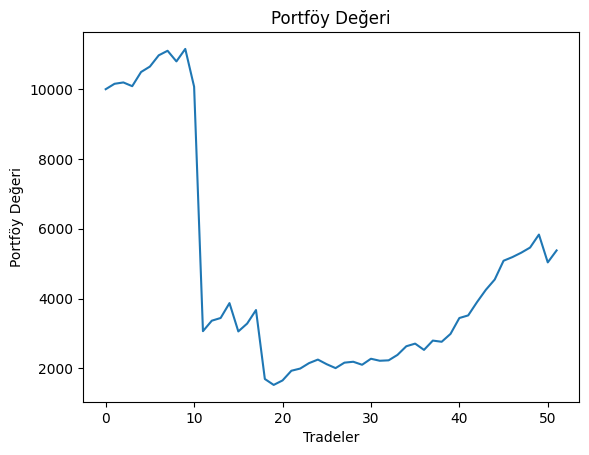

In [655]:
percentage_changes9_long = []

for i in range(0, len(trading_signals9)-1):

    if trading_signals9['Signal'].iloc[i] == 'Buy' and trading_signals9['Signal'].iloc[i+1] == 'Sell':
        buy_price = trading_signals9['Adj Close'].iloc[i]
        sell_price = trading_signals9['Adj Close'].iloc[i+1]
        percentage_change = ((sell_price - buy_price) / buy_price) * 100
        percentage_changes9_long.append(percentage_change)

print(percentage_changes9_long)

portfolio_value9_long = [initial_money]

for change in percentage_changes9_long:
    portfolio_value9_long.append(portfolio_value9_long[-1] * (1 + change / 100))


plt.plot(portfolio_value9_long)
plt.xlabel('Tradeler')
plt.ylabel('Portföy Değeri')
plt.title('Portföy Değeri')
plt.show()

In [656]:
differences9 = [portfolio_value9_long[i] - portfolio_value9_long[i-1] for i in range(1, len(portfolio_value9_long))]
maximum_negative_difference9 = min(differences9)
maximum_positive_difference9 = max(differences9)


maximum_loss_in_a_trade_strat9 = maximum_negative_difference9

maximum_profit_in_a_trade_strat9 = maximum_positive_difference9

portfolio_max_value_strat9 = max(portfolio_value9_long)

portfolio_minimum_value_strat9 = min(portfolio_value9_long)

df9 = trading_signals9.copy()
df9['Date'] = pd.to_datetime(df9['Date'])
df9['Trade_Number'] = df9['Signal'].eq('Buy').cumsum()
trade_durations9 = df9.groupby('Trade_Number')['Date'].apply(lambda x: x.iloc[-1] - x.iloc[0]).dt.days

average_trade_duration_strat9 = trade_durations9.mean()

trade_profits9 = np.diff(portfolio_value9_long)  

average_trade_profit_strat9 = np.mean(trade_profits9)

average_trades_per_year_strat9 = len(trading_signals9)/17

number_of_trades9 = len(trading_signals9)-1

final_value9 = portfolio_value9_long[-1]
annualized_return9 = ((final_value9 / initial_money) ** (1 / number_of_trades9)) - 1
annualized_return9 *= 100

annualized_return_strat9 = annualized_return9

portfolio_final_value_strat9 = final_value9

summary_of_strategies.loc['Strateji9'] = [

    annualized_return_strat9,
    average_trades_per_year_strat9,
    average_trade_profit_strat9,
    average_trade_duration_strat9,
    maximum_loss_in_a_trade_strat9,
    maximum_profit_in_a_trade_strat9,
    portfolio_max_value_strat9,
    portfolio_minimum_value_strat9,
    portfolio_final_value_strat9
]

summary_of_strategies

,Stratejinin yıllık getirisi,Bir yılda ortalama işlem sayısı,Ortalama işlem karı,Ortalama işlem uzunluğu,Bir işlemdeki maksimum zarar,Bir işlemdeki maksimum kar,Portföy (kapital) maksimum değeri,Portföy (kapital) minimum değeri,Portföy (kapital) son değeri
Strateji1 - İşlemler için komisyon alınmadığı durum,0.315317,0.117647,549.776159,6570.000000,0.000000,549.776159,15371.202019,837.484005,10549.776159
Strateji1 - İşlemler için komisyon alındığı durum,0.314198,0.117647,547.776159,6570.000000,0.000000,547.776159,15370.202019,836.484005,10547.776159
Strateji2 - İşlemler için komisyon alınmadığı durum,-1.395171,12.235294,0.680807,26.938679,-3375.745026,1372.910344,12725.637022,885.823879,7875.336492
Strateji2 - İşlemler için komisyon alındığı durum,-1.548038,12.235294,0.655426,26.938679,-3377.745026,1370.910344,12683.637022,842.823879,7670.336492
Strateji3 - İşlemler için komisyon alınmadığı durum,0.737790,1.882353,78.298550,176.235294,-5705.412889,5830.400033,14731.666626,3609.128621,11331.075343
Strateji3 - İşlemler için komisyon alındığı durum,0.718935,1.882353,77.298550,176.235294,-5707.412889,5828.400033,14699.666626,3601.128621,11295.075343
Strateji4 - İşlemler için komisyon alınmadığı durum,-0.035771,87.882353,-2.771870,1.456798,-3837.578942,2315.743403,14632.760908,4694.039651,5861.597484
Strateji4 - İşlemler için komisyon alındığı durum,-0.083490,87.882353,-3.771870,1.456798,-3839.578942,2313.743403,14030.760908,4044.039651,2873.597484
Strateji5 - Long Durum,0.101888,68.529412,19.518155,2.920962,-4832.218575,3870.413277,40230.028388,5286.568955,32719.131976
Strateji5 - Short Durum,-0.101784,68.529412,19.518155,2.715021,-2925.652723,5926.440889,18915.860334,2485.705430,3056.315799


# Strategy 10

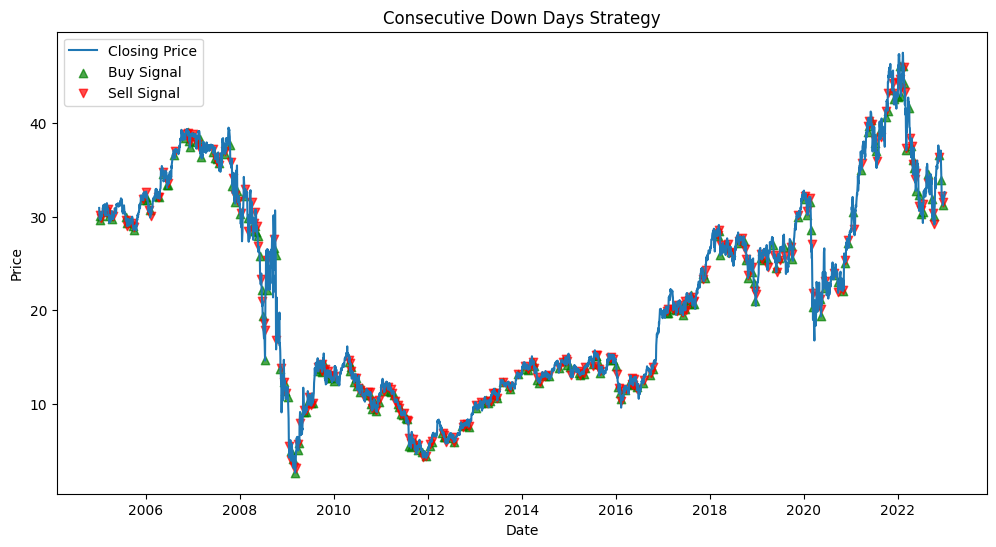

In [657]:
df10 = data.copy()
df10['Date'] = pd.to_datetime(df10['Date'])


df10['Signal'] = None

consecutive_down_days = 0

last_action = None

for i in range(1, len(df10)):
    if df10.at[i, 'Adj Close'] < df10.at[i - 1, 'Adj Close']:
        consecutive_down_days += 1
    else:
        consecutive_down_days = 0

    if consecutive_down_days >= 3:
        if last_action != 'Buy':
            df10.at[i, 'Signal'] = 'Buy'
            last_action = 'Buy'
    elif df10.at[i, 'Signal'] is None and df10.at[i, 'Adj Close'] > df10.at[i - 1, 'Adj Close']:
        if last_action != 'Sell':
            df10.at[i, 'Signal'] = 'Sell'
            last_action = 'Sell'


trading_signals10 = df10.loc[df10['Signal'].notnull()]


plt.figure(figsize=(12, 6))
plt.plot(df10['Date'], df10['Adj Close'], label='Closing Price')


buy_signals = trading_signals10[trading_signals10['Signal'] == 'Buy']
sell_signals = trading_signals10[trading_signals10['Signal'] == 'Sell']
plt.scatter(buy_signals['Date'], buy_signals['Adj Close'], c='g', marker='^', label='Buy Signal', alpha=0.7)
plt.scatter(sell_signals['Date'], sell_signals['Adj Close'], c='r', marker='v', label='Sell Signal', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('Consecutive Down Days Strategy')
plt.show()

In [658]:
trading_signals10

,Date,Open,High,Low,Close,Adj Close,Volume,Signal
3,2005-01-06,45.419998,45.630001,44.990002,45.220001,30.118887,14602200,Buy
5,2005-01-10,44.779999,45.340000,44.770000,45.290001,30.165506,11488600,Sell
8,2005-01-13,45.099998,45.150002,44.400002,44.500000,29.639322,12200500,Buy
9,2005-01-14,44.849998,45.009998,44.599998,44.889999,29.899075,11224200,Sell
33,2005-02-18,46.349998,46.360001,45.650002,45.740002,30.465223,11250300,Buy
...,...,...,...,...,...,...,...,...
4502,2022-11-18,37.790001,37.849998,36.919998,37.189999,36.444759,32041800,Sell
4512,2022-12-05,35.810001,35.889999,34.139999,34.470001,33.976753,71386600,Buy
4517,2022-12-12,32.310001,32.779999,32.060001,32.730000,32.261650,41060500,Sell
4521,2022-12-16,31.620001,31.930000,31.350000,31.700001,31.246387,61795200,Buy


[0.15478327602211775, 0.8763796958648377, -0.021854427259572682, 0.3501003210494812, 0.357259854375031, 1.0162601762530503, -1.109853140281206, -1.0635650078021597, -0.5122320031798107, -0.07097386321272564, 1.201913413152996, 0.262109289055442, 1.9268531638617339, -3.406148173144007, -1.9444186077477605, -0.6308219292885456, 0.08757163697881845, 0.7113983529716941, 1.7845551103253414, 0.488453822791379, 1.1835867474276949, 1.2324887576071257, -0.5315320590696657, 0.2659085546666772, 1.722839085614368, 0.6375095274084533, -0.5343780987181789, -2.768453653203794, 2.618841317569775, 0.9439373739723539, 0.49036187654627483, -0.6146968836511854, -0.7865621896348843, 0.8772239698769638, -4.820769801870693, 2.4972441782252934, 2.3968334691294015, -3.391429781862086, 0.1255299907865458, 2.456851138636142, -4.654124916056083, 5.745316650759765, -1.8837144418610057, 2.740108180054767, 4.9280487620159805, 2.155542803699647, -3.795021948095658, -9.335760382451499, -5.401578067440763, -4.270041766

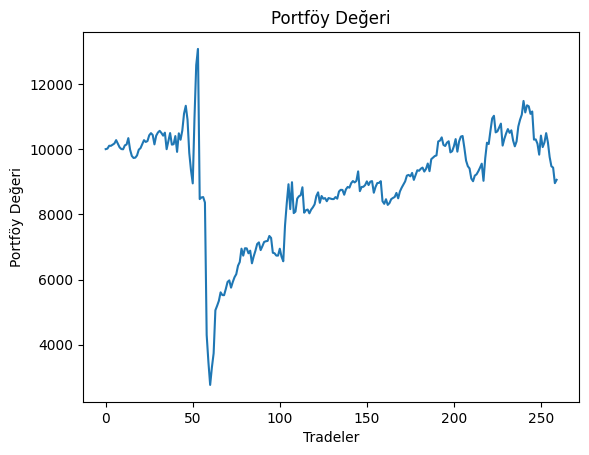

In [659]:
percentage_changes10_long = []

for i in range(0, len(trading_signals10)-1):

    if trading_signals10['Signal'].iloc[i] == 'Buy' and trading_signals10['Signal'].iloc[i+1] == 'Sell':
        buy_price = trading_signals10['Adj Close'].iloc[i]
        sell_price = trading_signals10['Adj Close'].iloc[i+1]
        percentage_change = ((sell_price - buy_price) / buy_price) * 100
        percentage_changes10_long.append(percentage_change)

print(percentage_changes10_long)

portfolio_value10_long = [initial_money]

for change in percentage_changes10_long:
    portfolio_value10_long.append(portfolio_value10_long[-1] * (1 + change / 100))


plt.plot(portfolio_value10_long)
plt.xlabel('Tradeler')
plt.ylabel('Portföy Değeri')
plt.title('Portföy Değeri')
plt.show()

In [660]:
differences10 = [portfolio_value10_long[i] - portfolio_value10_long[i-1] for i in range(1, len(portfolio_value10_long))]
maximum_negative_difference10 = min(differences10)
maximum_positive_difference10 = max(differences10)


maximum_loss_in_a_trade_strat10 = maximum_negative_difference10

maximum_profit_in_a_trade_strat10 = maximum_positive_difference10

portfolio_max_value_strat10 = max(portfolio_value10_long)

portfolio_minimum_value_strat10 = min(portfolio_value10_long)

df10 = trading_signals10.copy()
df10['Date'] = pd.to_datetime(df10['Date'])
df10['Trade_Number'] = df10['Signal'].eq('Buy').cumsum()
trade_durations10 = df10.groupby('Trade_Number')['Date'].apply(lambda x: x.iloc[-1] - x.iloc[0]).dt.days

average_trade_duration_strat10 = trade_durations10.mean()

trade_profits10 = np.diff(portfolio_value10_long)  

average_trade_profit_strat10 = np.mean(trade_profits10)

average_trades_per_year_strat10 = len(trading_signals10)/17

number_of_trades10 = len(trading_signals10)-1

final_value10 = portfolio_value10_long[-1]
annualized_return10 = ((final_value10 / initial_money) ** (1 / number_of_trades10)) - 1
annualized_return10 *= 100

annualized_return_strat10 = annualized_return10

portfolio_final_value_strat10 = final_value10

summary_of_strategies.loc['Strateji10'] = [

    annualized_return_strat10,
    average_trades_per_year_strat10,
    average_trade_profit_strat10,
    average_trade_duration_strat10,
    maximum_loss_in_a_trade_strat10,
    maximum_profit_in_a_trade_strat10,
    portfolio_max_value_strat10,
    portfolio_minimum_value_strat10,
    portfolio_final_value_strat10
]

summary_of_strategies

,Stratejinin yıllık getirisi,Bir yılda ortalama işlem sayısı,Ortalama işlem karı,Ortalama işlem uzunluğu,Bir işlemdeki maksimum zarar,Bir işlemdeki maksimum kar,Portföy (kapital) maksimum değeri,Portföy (kapital) minimum değeri,Portföy (kapital) son değeri
Strateji1 - İşlemler için komisyon alınmadığı durum,0.315317,0.117647,549.776159,6570.000000,0.000000,549.776159,15371.202019,837.484005,10549.776159
Strateji1 - İşlemler için komisyon alındığı durum,0.314198,0.117647,547.776159,6570.000000,0.000000,547.776159,15370.202019,836.484005,10547.776159
Strateji2 - İşlemler için komisyon alınmadığı durum,-1.395171,12.235294,0.680807,26.938679,-3375.745026,1372.910344,12725.637022,885.823879,7875.336492
Strateji2 - İşlemler için komisyon alındığı durum,-1.548038,12.235294,0.655426,26.938679,-3377.745026,1370.910344,12683.637022,842.823879,7670.336492
Strateji3 - İşlemler için komisyon alınmadığı durum,0.737790,1.882353,78.298550,176.235294,-5705.412889,5830.400033,14731.666626,3609.128621,11331.075343
Strateji3 - İşlemler için komisyon alındığı durum,0.718935,1.882353,77.298550,176.235294,-5707.412889,5828.400033,14699.666626,3601.128621,11295.075343
Strateji4 - İşlemler için komisyon alınmadığı durum,-0.035771,87.882353,-2.771870,1.456798,-3837.578942,2315.743403,14632.760908,4694.039651,5861.597484
Strateji4 - İşlemler için komisyon alındığı durum,-0.083490,87.882353,-3.771870,1.456798,-3839.578942,2313.743403,14030.760908,4044.039651,2873.597484
Strateji5 - Long Durum,0.101888,68.529412,19.518155,2.920962,-4832.218575,3870.413277,40230.028388,5286.568955,32719.131976
Strateji5 - Short Durum,-0.101784,68.529412,19.518155,2.715021,-2925.652723,5926.440889,18915.860334,2485.705430,3056.315799


# Strategy 11

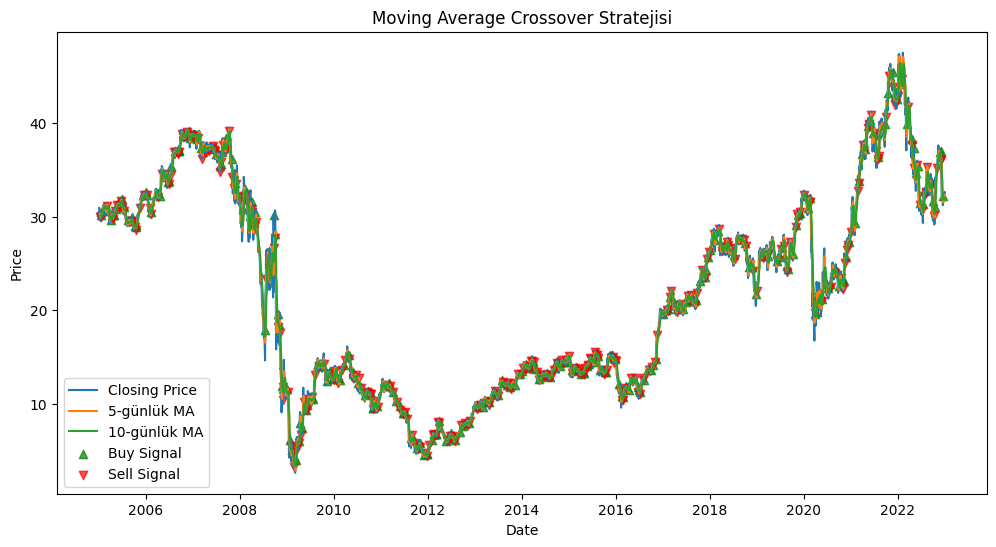

In [661]:
df11 = data.copy()
df11['Date'] = pd.to_datetime(df11['Date'])

df11['MA5'] = df11['Adj Close'].rolling(window=5).mean()
df11['MA10'] = df11['Adj Close'].rolling(window=10).mean()

df11['Signal'] = None

last_action = None

for i in range(1, len(df11)):
    if df11.at[i, 'Adj Close'] > df11.at[i, 'MA10'] and df11.at[i - 1, 'Adj Close'] <= df11.at[i - 1, 'MA10']:

        if last_action != 'Buy':
            df11.at[i, 'Signal'] = 'Buy'
            last_action = 'Buy'

    elif df11.at[i, 'Adj Close'] < df11.at[i, 'MA5'] and df11.at[i - 1, 'Adj Close'] >= df11.at[i - 1, 'MA5']:
        if last_action != 'Sell':
            df11.at[i, 'Signal'] = 'Sell'
            last_action = 'Sell'


trading_signals11 = df11.loc[df11['Signal'].notnull()]


plt.figure(figsize=(12, 6))
plt.plot(df11['Date'], df11['Adj Close'], label='Closing Price')
plt.plot(df11['Date'], df11['MA5'], label='5-günlük MA')
plt.plot(df11['Date'], df11['MA10'], label='10-günlük MA')


buy_signals = trading_signals11[trading_signals11['Signal'] == 'Buy']
sell_signals = trading_signals11[trading_signals11['Signal'] == 'Sell']
plt.scatter(buy_signals['Date'], buy_signals['Adj Close'], c='g', marker='^', label='Buy Signal', alpha=0.7)
plt.scatter(sell_signals['Date'], sell_signals['Adj Close'], c='r', marker='v', label='Sell Signal', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('Moving Average Crossover Stratejisi')
plt.show()

In [662]:
trading_signals11 = trading_signals11.drop(index=trading_signals11.index[0])
trading_signals11 = trading_signals11.drop(index=trading_signals11.index[-1])
trading_signals11

,Date,Open,High,Low,Close,Adj Close,Volume,MA5,MA10,Signal
10,2005-01-18,45.040001,45.980000,44.709999,45.730000,30.458565,15553300,30.020308,30.086247,Buy
11,2005-01-19,45.250000,45.380001,44.919998,44.970001,29.952379,10838600,29.992334,30.029633,Sell
12,2005-01-20,44.930000,45.570000,44.910000,45.310001,30.178818,11086700,30.025632,30.030965,Buy
13,2005-01-21,45.259998,45.500000,45.020000,45.090000,30.032299,8258900,30.104227,30.022306,Sell
37,2005-02-25,46.099998,46.990002,45.900002,46.790001,31.164589,8157100,30.593104,30.878180,Buy
...,...,...,...,...,...,...,...,...,...,...
4491,2022-11-03,35.700001,36.139999,35.410000,35.889999,35.170807,30046500,35.357001,35.021854,Sell
4506,2022-11-25,37.720001,37.869999,37.560001,37.700001,36.944538,16118500,36.709348,36.817144,Buy
4507,2022-11-28,37.400002,37.660000,36.830002,36.860001,36.121376,35428300,36.644672,36.665250,Sell
4509,2022-11-30,36.900002,37.849998,36.200001,37.849998,37.091530,51747900,36.654470,36.605472,Buy


[-1.6618839397062848, -0.48550277880333614, -0.027589004944038303, 1.1775104336431401, -1.557943105364122, 1.472245784328906, 1.5049158018526732, -1.1018185568550367, -0.36883365812889873, 0.0, -2.771272449530002, -1.4644116049791533, -0.8691158965242961, 0.0, -1.5567620104591642, -0.33152932073367963, -1.1415297201599082, 5.961414687558734, 0.06451888605750483, -1.0832717171307797, -4.549372962291209, -0.5008926878283694, -1.1881251969719442, 7.26712602741661, -0.429323224064409, -0.5048809537364226, 1.9307545151426402, 4.224203969769497, -0.03839087549739325, -0.4637744145886765, -0.929164739724929, -0.4835547264533736, 4.750805305342731, -1.2502213638278254, -0.5555423420070447, -0.09278811567269371, 0.4611500296886336, -0.9626017494803227, 0.7911299526469916, -0.8011574108063494, -0.5972188396432576, -0.2246101565855908, -0.5038432599349046, 0.283862678373398, -2.9244106281017563, 0.794108876908723, -1.328348799014937, -0.6246503439957122, -0.6269650823065507, -0.8429623667967975, 

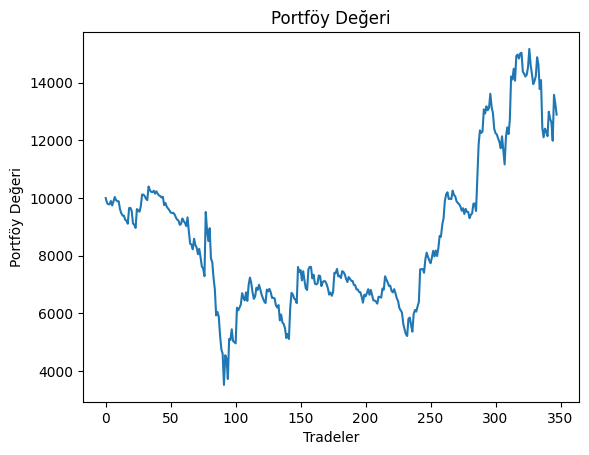

In [663]:
percentage_changes11_long = []

for i in range(0, len(trading_signals11)-1):

    if trading_signals11['Signal'].iloc[i] == 'Buy' and trading_signals11['Signal'].iloc[i+1] == 'Sell':
        buy_price = trading_signals11['Adj Close'].iloc[i]
        sell_price = trading_signals11['Adj Close'].iloc[i+1]
        percentage_change = ((sell_price - buy_price) / buy_price) * 100
        percentage_changes11_long.append(percentage_change)

print(percentage_changes11_long)

portfolio_value11_long = [initial_money]

for change in percentage_changes11_long:
    portfolio_value11_long.append(portfolio_value11_long[-1] * (1 + change / 100))


plt.plot(portfolio_value11_long)
plt.xlabel('Tradeler')
plt.ylabel('Portföy Değeri')
plt.title('Portföy Değeri')
plt.show()

In [664]:
differences11 = [portfolio_value11_long[i] - portfolio_value11_long[i-1] for i in range(1, len(portfolio_value11_long))]
maximum_negative_difference11 = min(differences11)
maximum_positive_difference11 = max(differences11)


maximum_loss_in_a_trade_strat11 = maximum_negative_difference11

maximum_profit_in_a_trade_strat11 = maximum_positive_difference11

portfolio_max_value_strat11 = max(portfolio_value11_long)

portfolio_minimum_value_strat11 = min(portfolio_value11_long)

df11 = trading_signals11.copy()
df11['Date'] = pd.to_datetime(df11['Date'])
df11['Trade_Number'] = df11['Signal'].eq('Buy').cumsum()
trade_durations11 = df11.groupby('Trade_Number')['Date'].apply(lambda x: x.iloc[-1] - x.iloc[0]).dt.days

average_trade_duration_strat11 = trade_durations11.mean()

trade_profits11 = np.diff(portfolio_value11_long)  

average_trade_profit_strat11 = np.mean(trade_profits11)

average_trades_per_year_strat11 = len(trading_signals11)/17

number_of_trades11 = len(trading_signals11)-1

final_value11 = portfolio_value11_long[-1]
annualized_return11 = ((final_value11 / initial_money) ** (1 / number_of_trades11)) - 1
annualized_return11 *= 100

annualized_return_strat11 = annualized_return11

portfolio_final_value_strat11 = final_value11

summary_of_strategies.loc['Strateji11'] = [

    annualized_return_strat11,
    average_trades_per_year_strat11,
    average_trade_profit_strat11,
    average_trade_duration_strat11,
    maximum_loss_in_a_trade_strat11,
    maximum_profit_in_a_trade_strat11,
    portfolio_max_value_strat11,
    portfolio_minimum_value_strat11,
    portfolio_final_value_strat11
]

summary_of_strategies

,Stratejinin yıllık getirisi,Bir yılda ortalama işlem sayısı,Ortalama işlem karı,Ortalama işlem uzunluğu,Bir işlemdeki maksimum zarar,Bir işlemdeki maksimum kar,Portföy (kapital) maksimum değeri,Portföy (kapital) minimum değeri,Portföy (kapital) son değeri
Strateji1 - İşlemler için komisyon alınmadığı durum,0.315317,0.117647,549.776159,6570.000000,0.000000,549.776159,15371.202019,837.484005,10549.776159
Strateji1 - İşlemler için komisyon alındığı durum,0.314198,0.117647,547.776159,6570.000000,0.000000,547.776159,15370.202019,836.484005,10547.776159
Strateji2 - İşlemler için komisyon alınmadığı durum,-1.395171,12.235294,0.680807,26.938679,-3375.745026,1372.910344,12725.637022,885.823879,7875.336492
Strateji2 - İşlemler için komisyon alındığı durum,-1.548038,12.235294,0.655426,26.938679,-3377.745026,1370.910344,12683.637022,842.823879,7670.336492
Strateji3 - İşlemler için komisyon alınmadığı durum,0.737790,1.882353,78.298550,176.235294,-5705.412889,5830.400033,14731.666626,3609.128621,11331.075343
Strateji3 - İşlemler için komisyon alındığı durum,0.718935,1.882353,77.298550,176.235294,-5707.412889,5828.400033,14699.666626,3601.128621,11295.075343
Strateji4 - İşlemler için komisyon alınmadığı durum,-0.035771,87.882353,-2.771870,1.456798,-3837.578942,2315.743403,14632.760908,4694.039651,5861.597484
Strateji4 - İşlemler için komisyon alındığı durum,-0.083490,87.882353,-3.771870,1.456798,-3839.578942,2313.743403,14030.760908,4044.039651,2873.597484
Strateji5 - Long Durum,0.101888,68.529412,19.518155,2.920962,-4832.218575,3870.413277,40230.028388,5286.568955,32719.131976
Strateji5 - Short Durum,-0.101784,68.529412,19.518155,2.715021,-2925.652723,5926.440889,18915.860334,2485.705430,3056.315799


# Strategy 12

In [665]:
df12 = data.copy()
df12['Date'] = pd.to_datetime(df12['Date'])

df12['MA50'] = df12['Adj Close'].rolling(window=50).mean()


df12['Signal'] = None
last_action = None
is_hold_for_buy = False
is_hold_for_sell = False

for i in range(1, len(df12)):
    if df12.at[i, 'Adj Close'] < (0.97 * df12.at[i, 'MA50']) and is_hold_for_buy != True:
        is_hold_for_buy = True
       
    
    if is_hold_for_buy is True and df12.at[i, 'Adj Close'] > df12.at[i-1, 'Adj Close']:
        if last_action != 'Buy':
            df12.at[i, 'Signal'] = 'Buy'
            last_action = 'Buy'
            is_hold_for_buy = False

    elif df12.at[i, 'Adj Close'] > df12.at[i, 'MA50'] * 1.03 and is_hold_for_sell != True:
        is_hold_for_sell = True
        
        
    if is_hold_for_sell is True and df12.at[i, 'Adj Close'] < df12.at[i-1, 'Adj Close']:
        if last_action != 'Sell':
            df12.at[i, 'Signal'] = 'Sell'
            last_action = 'Sell'
            is_hold_for_sell = False


df12.dropna(subset=['Signal'], inplace=True)
df12.drop(df12.index[-1], inplace=True)
df12







,Date,Open,High,Low,Close,Adj Close,Volume,MA50,Signal
55,2005-03-23,43.509998,44.220001,43.419998,43.980000,29.575665,16983100,30.643747,Buy
95,2005-05-19,46.349998,46.740002,46.169998,46.450001,31.236696,6709900,30.230260,Sell
96,2005-05-20,46.500000,46.639999,46.250000,46.570000,31.317406,7617800,30.239810,Buy
97,2005-05-23,46.500000,46.750000,46.470001,46.549999,31.303940,5728600,30.250300,Sell
145,2005-08-01,43.770000,43.849998,43.580002,43.660000,29.648516,12298400,31.014995,Buy
...,...,...,...,...,...,...,...,...,...
4488,2022-10-31,36.000000,36.330002,35.810001,36.040001,35.317802,32565500,32.610831,Sell
4489,2022-11-01,36.439999,36.759998,36.110001,36.200001,35.474598,29913200,32.644292,Buy
4490,2022-11-02,36.070000,37.279999,35.950001,36.090000,35.366802,57380600,32.681633,Sell
4517,2022-12-12,32.310001,32.779999,32.060001,32.730000,32.261650,41060500,34.293171,Buy


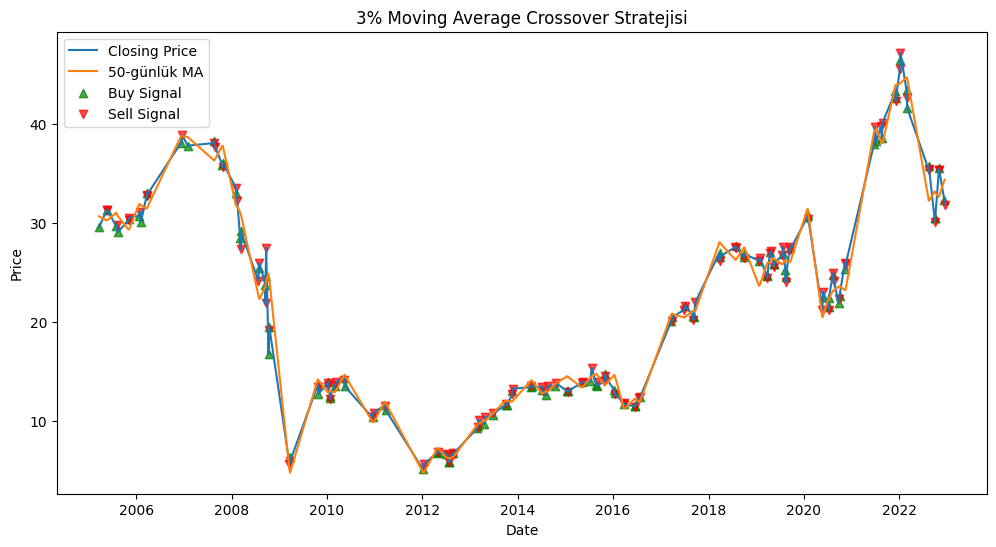

In [666]:
plt.figure(figsize=(12, 6))
plt.plot(df12['Date'], df12['Adj Close'], label='Closing Price')
plt.plot(df12['Date'], df12['MA50'], label='50-günlük MA')

trading_signals12 = df12.loc[df12['Signal'].notnull()]

buy_signals = trading_signals12[trading_signals12['Signal'] == 'Buy']
sell_signals = trading_signals12[trading_signals12['Signal'] == 'Sell']
plt.scatter(buy_signals['Date'], buy_signals['Adj Close'], c='g', marker='^', label='Buy Signal', alpha=0.7)
plt.scatter(sell_signals['Date'], sell_signals['Adj Close'], c='r', marker='v', label='Sell Signal', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('3% Moving Average Crossover Stratejisi')
plt.show()

[5.616208460570532, -0.042998452681545646, 0.2748130800206007, 4.0582261787917355, 0.36170386196000115, 1.265769594761825, 8.562279677315196, -0.6171075193812489, 1.9599879188990448, 0.7226987156668558, -1.510121638334268, -0.6278480416510682, -6.996843224901513, -2.605452422497863, -3.8922562300246955, -17.178591943282115, 2.1104755541712086, -7.9526042590701325, 11.67431579251916, 14.13511003143754, -70.6915146365181, -7.4358965198160725, -1.8159529851649057, 8.676749229102038, -3.366804438453507, -1.4018706675054173, 8.360775287881832, 2.743935077618268, -0.8092492008818616, -23.12119816686506, 4.313110823201721, -0.715318294496313, -53.589340945742215, 8.293453906015312, 0.48721217636375064, -2.998417324528647, -3.101741725120573, -0.7052432561799286, 15.275750931672185, -1.1029503419379152, 0.9891797602398691, 6.437400206364205, 6.5180150295327035, 1.499584642985831, 0.7194483189806774, 9.393082525577436, 1.5394734811365256, 0.8124868068390368, -1.236791349340697, -0.5769349043330

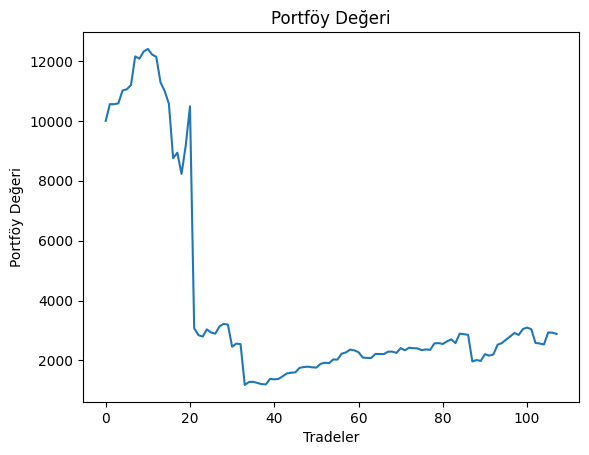

In [667]:
percentage_changes12_long = []

for i in range(0, len(trading_signals12)-1):

    if trading_signals12['Signal'].iloc[i] == 'Buy' and trading_signals12['Signal'].iloc[i+1] == 'Sell':
        buy_price = trading_signals12['Adj Close'].iloc[i]
        sell_price = trading_signals12['Adj Close'].iloc[i+1]
        percentage_change = ((sell_price - buy_price) / buy_price) * 100
        percentage_changes12_long.append(percentage_change)

print(percentage_changes12_long)

portfolio_value12_long = [initial_money]

for change in percentage_changes12_long:
    portfolio_value12_long.append(portfolio_value12_long[-1] * (1 + change / 100))


plt.plot(portfolio_value12_long)
plt.xlabel('Tradeler')
plt.ylabel('Portföy Değeri')
plt.title('Portföy Değeri')
plt.show()

In [668]:
differences12 = [portfolio_value12_long[i] - portfolio_value12_long[i-1] for i in range(1, len(portfolio_value12_long))]
maximum_negative_difference12 = min(differences12)
maximum_positive_difference12 = max(differences12)


maximum_loss_in_a_trade_strat12 = maximum_negative_difference12

maximum_profit_in_a_trade_strat12 = maximum_positive_difference12

portfolio_max_value_strat12 = max(portfolio_value12_long)

portfolio_minimum_value_strat12 = min(portfolio_value12_long)

df12 = trading_signals12.copy()
df12['Date'] = pd.to_datetime(df12['Date'])
df12['Trade_Number'] = df12['Signal'].eq('Buy').cumsum()
trade_durations12 = df12.groupby('Trade_Number')['Date'].apply(lambda x: x.iloc[-1] - x.iloc[0]).dt.days

average_trade_duration_strat12 = trade_durations12.mean()

trade_profits12 = np.diff(portfolio_value12_long)  

average_trade_profit_strat12 = np.mean(trade_profits12)

average_trades_per_year_strat12 = len(trading_signals12)/17

number_of_trades12 = len(trading_signals12)-1

final_value12 = portfolio_value12_long[-1]
annualized_return12 = ((final_value12 / initial_money) ** (1 / number_of_trades12)) - 1
annualized_return12 *= 100

annualized_return_strat12 = annualized_return12

portfolio_final_value_strat12 = final_value12

summary_of_strategies.loc['Strateji12'] = [

    annualized_return_strat12,
    average_trades_per_year_strat12,
    average_trade_profit_strat12,
    average_trade_duration_strat12,
    maximum_loss_in_a_trade_strat12,
    maximum_profit_in_a_trade_strat12,
    portfolio_max_value_strat12,
    portfolio_minimum_value_strat12,
    portfolio_final_value_strat12
]

summary_of_strategies

,Stratejinin yıllık getirisi,Bir yılda ortalama işlem sayısı,Ortalama işlem karı,Ortalama işlem uzunluğu,Bir işlemdeki maksimum zarar,Bir işlemdeki maksimum kar,Portföy (kapital) maksimum değeri,Portföy (kapital) minimum değeri,Portföy (kapital) son değeri
Strateji1 - İşlemler için komisyon alınmadığı durum,0.315317,0.117647,549.776159,6570.000000,0.000000,549.776159,15371.202019,837.484005,10549.776159
Strateji1 - İşlemler için komisyon alındığı durum,0.314198,0.117647,547.776159,6570.000000,0.000000,547.776159,15370.202019,836.484005,10547.776159
Strateji2 - İşlemler için komisyon alınmadığı durum,-1.395171,12.235294,0.680807,26.938679,-3375.745026,1372.910344,12725.637022,885.823879,7875.336492
Strateji2 - İşlemler için komisyon alındığı durum,-1.548038,12.235294,0.655426,26.938679,-3377.745026,1370.910344,12683.637022,842.823879,7670.336492
Strateji3 - İşlemler için komisyon alınmadığı durum,0.737790,1.882353,78.298550,176.235294,-5705.412889,5830.400033,14731.666626,3609.128621,11331.075343
Strateji3 - İşlemler için komisyon alındığı durum,0.718935,1.882353,77.298550,176.235294,-5707.412889,5828.400033,14699.666626,3601.128621,11295.075343
Strateji4 - İşlemler için komisyon alınmadığı durum,-0.035771,87.882353,-2.771870,1.456798,-3837.578942,2315.743403,14632.760908,4694.039651,5861.597484
Strateji4 - İşlemler için komisyon alındığı durum,-0.083490,87.882353,-3.771870,1.456798,-3839.578942,2313.743403,14030.760908,4044.039651,2873.597484
Strateji5 - Long Durum,0.101888,68.529412,19.518155,2.920962,-4832.218575,3870.413277,40230.028388,5286.568955,32719.131976
Strateji5 - Short Durum,-0.101784,68.529412,19.518155,2.715021,-2925.652723,5926.440889,18915.860334,2485.705430,3056.315799


# Strategy 13

In [669]:
def calculate_linear_regression(window):
    X = np.arange(len(window)).reshape(-1, 1)
    y = window.values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)
    return model.coef_[0][0], model.intercept_[0]

def implement_strategy(data):
    data['Signal'] = None
    window_size = 30

    last_signal = None  

    for i in range(window_size, len(data)):
        window = data['Adj Close'].iloc[i - window_size:i]
        slope, intercept = calculate_linear_regression(window)

        if data.at[i, 'Adj Close'] < (intercept - 0.01 * slope):
            if last_signal != 'Buy':  
                data.at[i, 'Signal'] = 'Buy'
                last_signal = 'Buy'
        elif data.at[i, 'Adj Close'] > (intercept + 0.01 * slope):
            if last_signal != 'Sell':  
                data.at[i, 'Signal'] = 'Sell'
                last_signal = 'Sell'

    return data.dropna(subset=['Signal'])

df13 = data.copy()
df13['Date'] = pd.to_datetime(df13['Date'])
df13.sort_values('Date', inplace=True)
df13.reset_index(drop=True, inplace=True)

df_with_signals = implement_strategy(df13)

df_with_signals.drop(df_with_signals.index[0], inplace=True)
df_with_signals.drop(df_with_signals.index[-1], inplace=True)

df_with_signals

C:\Users\oguzd\AppData\Local\Temp\ipykernel_2020\386443727.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_signals.drop(df_with_signals.index[0], inplace=True)
C:\Users\oguzd\AppData\Local\Temp\ipykernel_2020\386443727.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_signals.drop(df_with_signals.index[-1], inplace=True)


,Date,Open,High,Low,Close,Adj Close,Volume,Signal
47,2005-03-11,45.889999,46.099998,45.549999,45.770000,30.779415,7595000,Buy
77,2005-04-25,44.720001,44.910000,44.250000,44.830002,30.147276,8189300,Sell
124,2005-06-30,46.500000,46.500000,45.580002,45.610001,30.972708,42051300,Buy
171,2005-09-07,43.349998,43.410000,43.150002,43.310001,29.756031,9770000,Sell
174,2005-09-12,42.900002,43.049999,42.689999,42.700001,29.336941,13153800,Buy
...,...,...,...,...,...,...,...,...
4451,2022-09-08,33.459999,34.730000,33.270000,34.650002,33.955658,44361800,Sell
4454,2022-09-13,34.580002,34.720001,33.810001,34.000000,33.318684,40959600,Buy
4479,2022-10-18,34.980000,35.360001,34.279999,34.880001,34.181049,81937900,Sell
4480,2022-10-19,34.580002,34.830002,33.770000,33.919998,33.240284,43139900,Buy


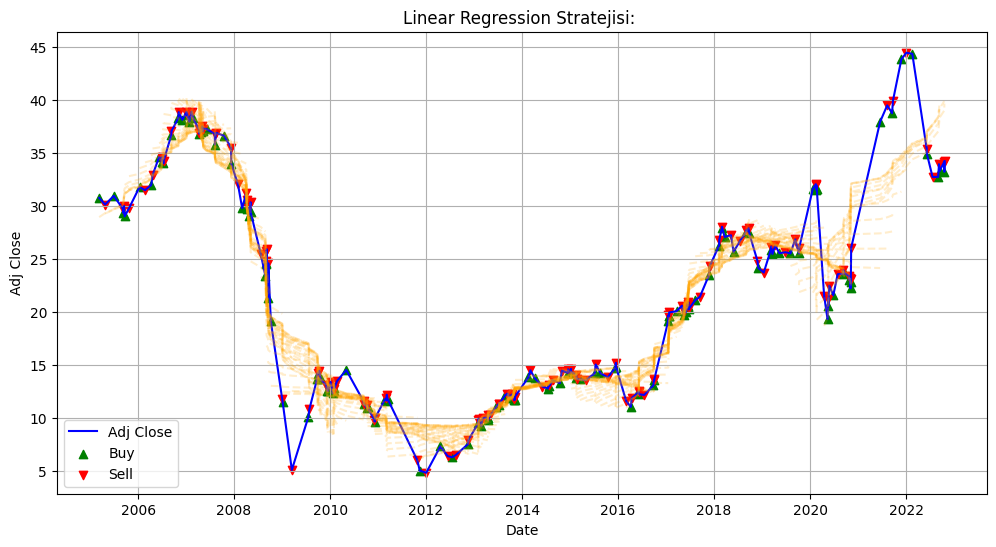

In [670]:
plt.figure(figsize=(12, 6))
plt.plot(df_with_signals['Date'], df_with_signals['Adj Close'], label='Adj Close', color='blue')

for i in range(len(df_with_signals) - 30):
    window = df_with_signals['Adj Close'].iloc[i:i + 30]
    X = np.arange(len(window)).reshape(-1, 1)
    slope, intercept = calculate_linear_regression(window)
    plt.plot(df_with_signals['Date'].iloc[i:i + 30], slope * X + intercept, linestyle='dashed', color='orange', alpha=0.2)

plt.scatter(df_with_signals[df_with_signals['Signal'] == 'Buy']['Date'],
            df_with_signals[df_with_signals['Signal'] == 'Buy']['Adj Close'],
            marker='^', color='green', label='Buy')
plt.scatter(df_with_signals[df_with_signals['Signal'] == 'Sell']['Date'],
            df_with_signals[df_with_signals['Signal'] == 'Sell']['Adj Close'],
            marker='v', color='red', label='Sell')

trading_signals13 = df13.loc[df13['Signal'].notnull()]

plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Linear Regression Stratejisi: ')
plt.legend()
plt.grid(True)
plt.show()


[-2.053771977147709, -3.9282228728595534, 2.2950518256146712, 2.6502591801404636, -0.9388919313948129, 2.875311381272717, -0.38943556920367994, 1.4761460858874427, 0.6877941424034811, 1.0160412304122004, 1.4598422410107563, 1.9372633537721662, 0.39449460970995764, 2.5381728366759266, -2.7110628878873335, 0.2784297210900674, 0.21776574015207992, 1.0252569587558011, 0.731500885471372, -1.2517505866403247, 3.1024182150687634, -3.137525117947077, -5.464715483904473, 4.766256947926735, 0.22836874060426504, 0.46894773504898046, 4.333984984701742, -13.20069409142163, 6.003370677245353, 4.7848518832636575, 5.326791914102181, 15.178892864223478, -38.34083922073435, -55.67253010033648, 6.94438221888595, 3.7349166128321216, 1.9813411348393741, -3.694735561668571, 2.761352276369409, 6.649124829028372, 3.1543526351552997, 2.76680159860215, 5.151323514860094, -20.442740740888556, 0.21931752964106832, 2.813671906433102, -10.678378079268654, 3.092756386662694, 0.7069856091622487, 4.704211834720576, -4

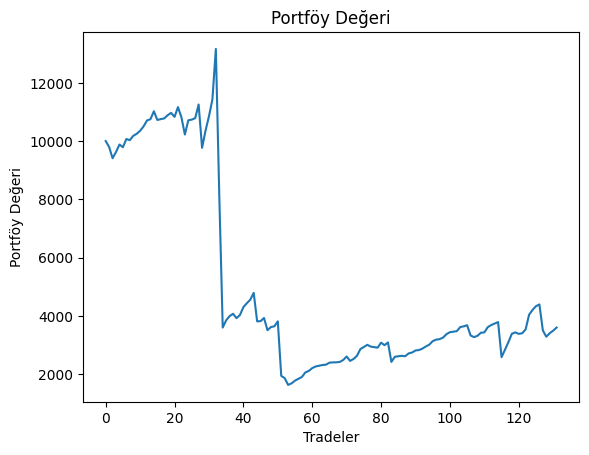

In [671]:
percentage_changes13_long = []

for i in range(0, len(trading_signals13)-1):

    if trading_signals13['Signal'].iloc[i] == 'Buy' and trading_signals13['Signal'].iloc[i+1] == 'Sell':
        buy_price = trading_signals13['Adj Close'].iloc[i]
        sell_price = trading_signals13['Adj Close'].iloc[i+1]
        percentage_change = ((sell_price - buy_price) / buy_price) * 100
        percentage_changes13_long.append(percentage_change)

print(percentage_changes13_long)

portfolio_value13_long = [initial_money]

for change in percentage_changes13_long:
    portfolio_value13_long.append(portfolio_value13_long[-1] * (1 + change / 100))


plt.plot(portfolio_value13_long)
plt.xlabel('Tradeler')
plt.ylabel('Portföy Değeri')
plt.title('Portföy Değeri')
plt.show()

In [672]:
differences13 = [portfolio_value13_long[i] - portfolio_value13_long[i-1] for i in range(1, len(portfolio_value13_long))]
maximum_negative_difference13 = min(differences13)
maximum_positive_difference13 = max(differences13)


maximum_loss_in_a_trade_strat13 = maximum_negative_difference13

maximum_profit_in_a_trade_strat13 = maximum_positive_difference13

portfolio_max_value_strat13 = max(portfolio_value13_long)

portfolio_minimum_value_strat13 = min(portfolio_value13_long)

df13 = trading_signals13.copy()
df13['Date'] = pd.to_datetime(df13['Date'])
df13['Trade_Number'] = df13['Signal'].eq('Buy').cumsum()
trade_durations13 = df13.groupby('Trade_Number')['Date'].apply(lambda x: x.iloc[-1] - x.iloc[0]).dt.days

average_trade_duration_strat13 = trade_durations13.mean()

trade_profits13 = np.diff(portfolio_value13_long)  

average_trade_profit_strat13 = np.mean(trade_profits12)

average_trades_per_year_strat13 = len(trading_signals13)/17

number_of_trades13 = len(trading_signals13)-1

final_value13 = portfolio_value13_long[-1]
annualized_return13 = ((final_value13 / initial_money) ** (1 / number_of_trades13)) - 1
annualized_return13 *= 100

annualized_return_strat13 = annualized_return13

portfolio_final_value_strat13 = final_value13

summary_of_strategies.loc['Strateji13'] = [

    annualized_return_strat13,
    average_trades_per_year_strat13,
    average_trade_profit_strat13,
    average_trade_duration_strat13,
    maximum_loss_in_a_trade_strat13,
    maximum_profit_in_a_trade_strat13,
    portfolio_max_value_strat13,
    portfolio_minimum_value_strat13,
    portfolio_final_value_strat13
]

summary_of_strategies

,Stratejinin yıllık getirisi,Bir yılda ortalama işlem sayısı,Ortalama işlem karı,Ortalama işlem uzunluğu,Bir işlemdeki maksimum zarar,Bir işlemdeki maksimum kar,Portföy (kapital) maksimum değeri,Portföy (kapital) minimum değeri,Portföy (kapital) son değeri
Strateji1 - İşlemler için komisyon alınmadığı durum,0.315317,0.117647,549.776159,6570.000000,0.000000,549.776159,15371.202019,837.484005,10549.776159
Strateji1 - İşlemler için komisyon alındığı durum,0.314198,0.117647,547.776159,6570.000000,0.000000,547.776159,15370.202019,836.484005,10547.776159
Strateji2 - İşlemler için komisyon alınmadığı durum,-1.395171,12.235294,0.680807,26.938679,-3375.745026,1372.910344,12725.637022,885.823879,7875.336492
Strateji2 - İşlemler için komisyon alındığı durum,-1.548038,12.235294,0.655426,26.938679,-3377.745026,1370.910344,12683.637022,842.823879,7670.336492
Strateji3 - İşlemler için komisyon alınmadığı durum,0.737790,1.882353,78.298550,176.235294,-5705.412889,5830.400033,14731.666626,3609.128621,11331.075343
Strateji3 - İşlemler için komisyon alındığı durum,0.718935,1.882353,77.298550,176.235294,-5707.412889,5828.400033,14699.666626,3601.128621,11295.075343
Strateji4 - İşlemler için komisyon alınmadığı durum,-0.035771,87.882353,-2.771870,1.456798,-3837.578942,2315.743403,14632.760908,4694.039651,5861.597484
Strateji4 - İşlemler için komisyon alındığı durum,-0.083490,87.882353,-3.771870,1.456798,-3839.578942,2313.743403,14030.760908,4044.039651,2873.597484
Strateji5 - Long Durum,0.101888,68.529412,19.518155,2.920962,-4832.218575,3870.413277,40230.028388,5286.568955,32719.131976
Strateji5 - Short Durum,-0.101784,68.529412,19.518155,2.715021,-2925.652723,5926.440889,18915.860334,2485.705430,3056.315799


# RESULTS and COMMENTS

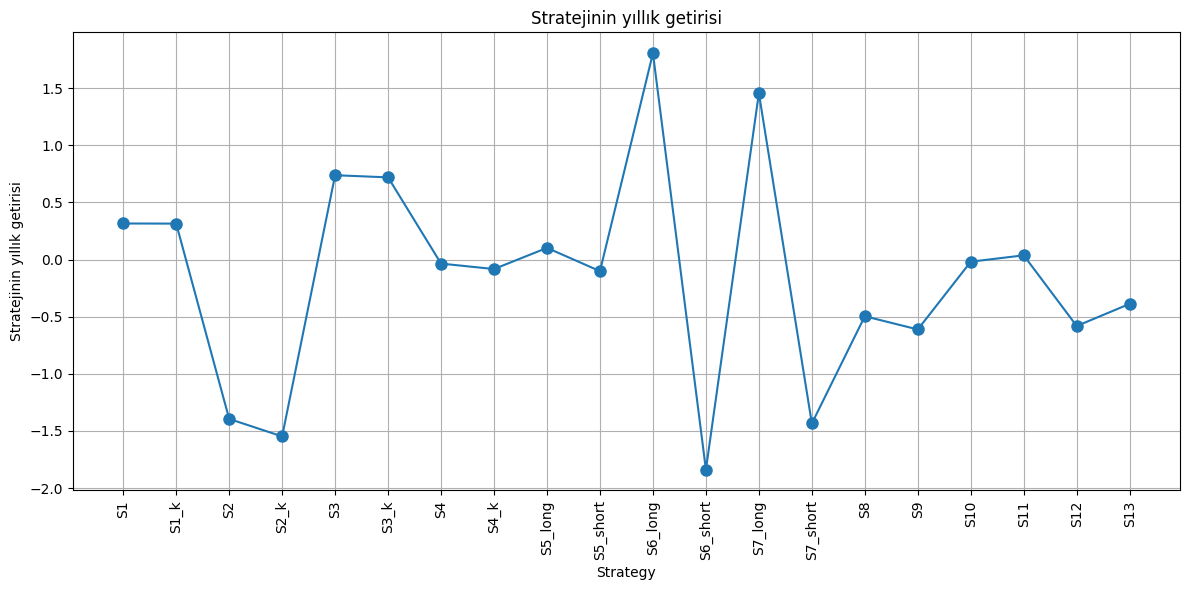

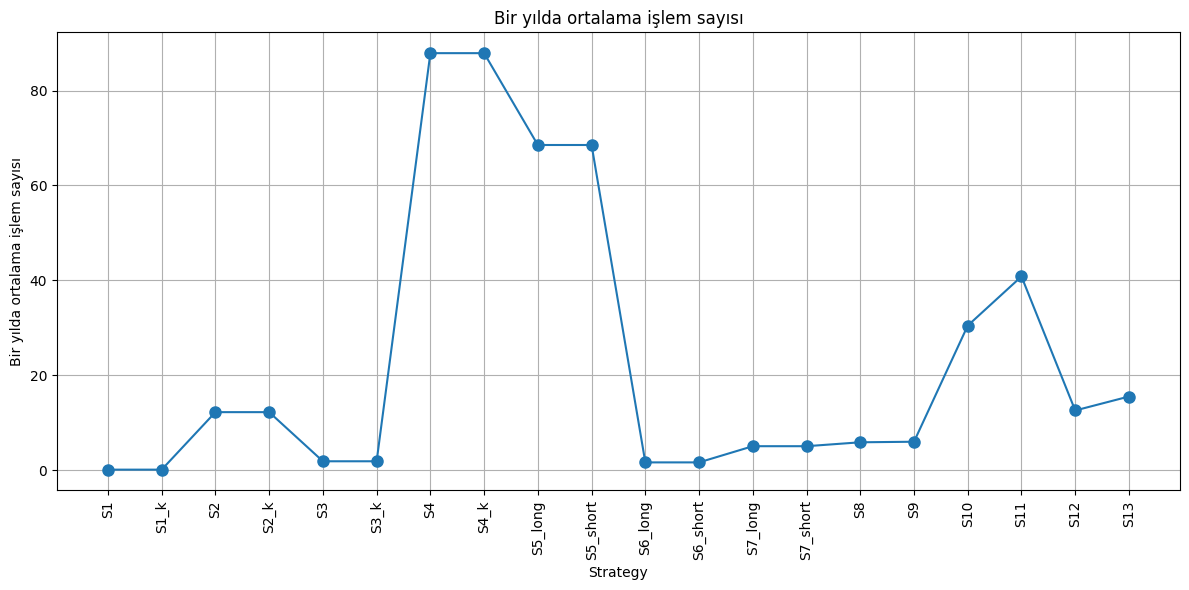

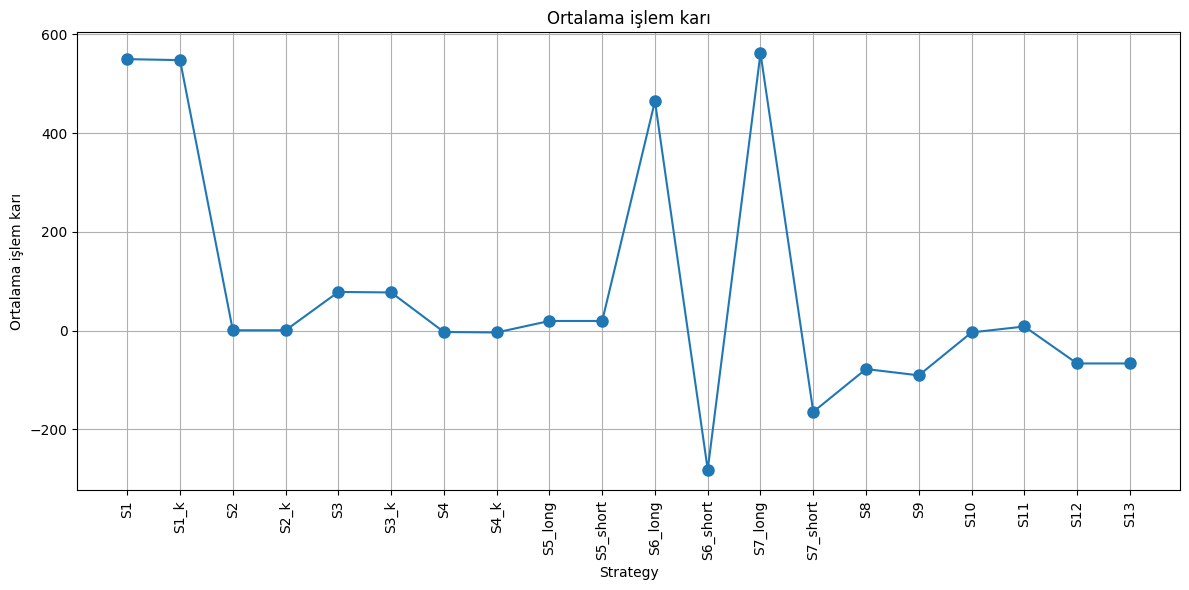

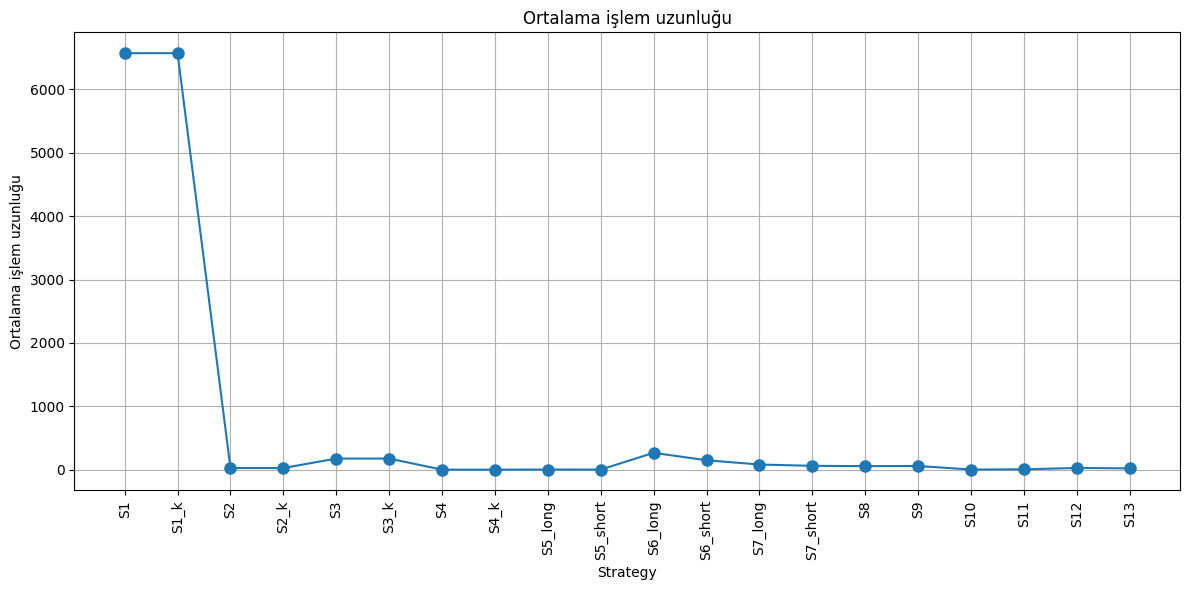

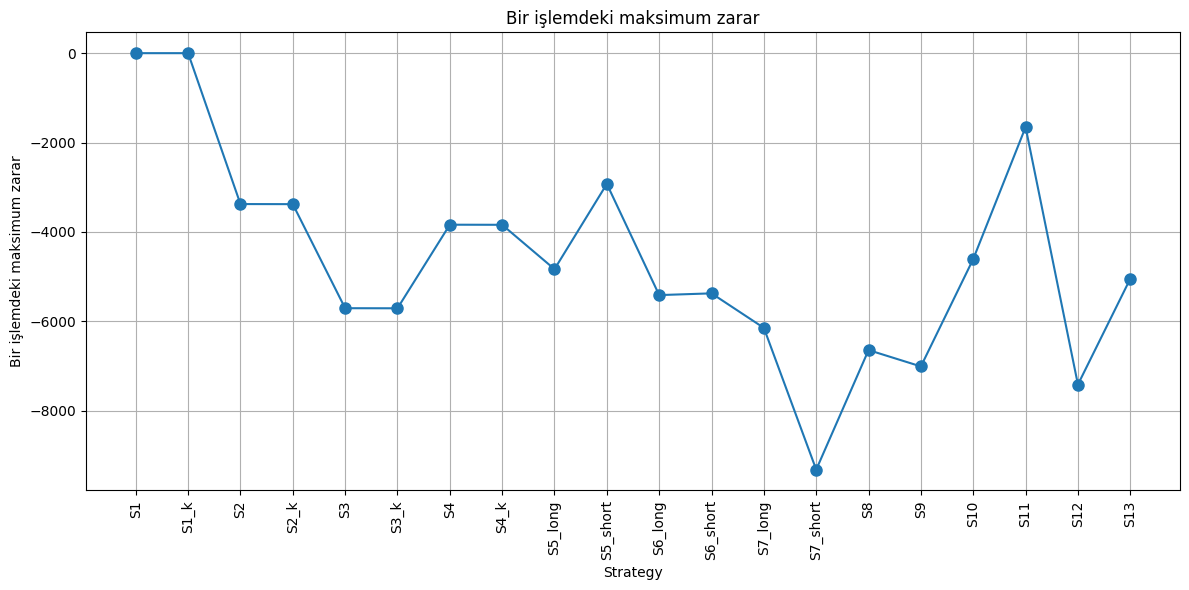

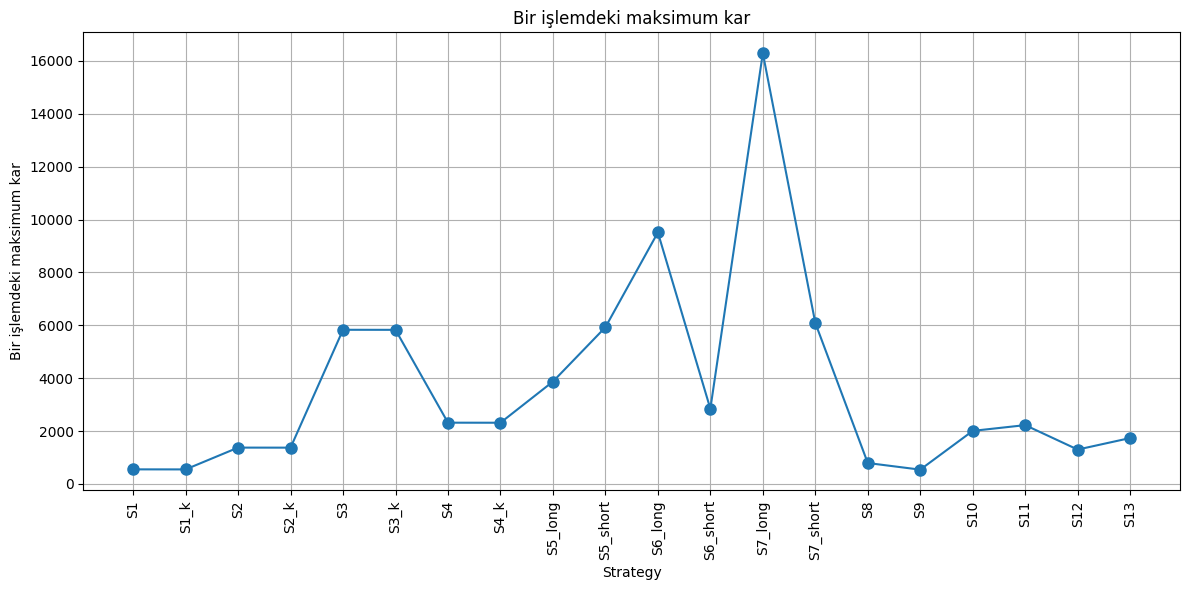

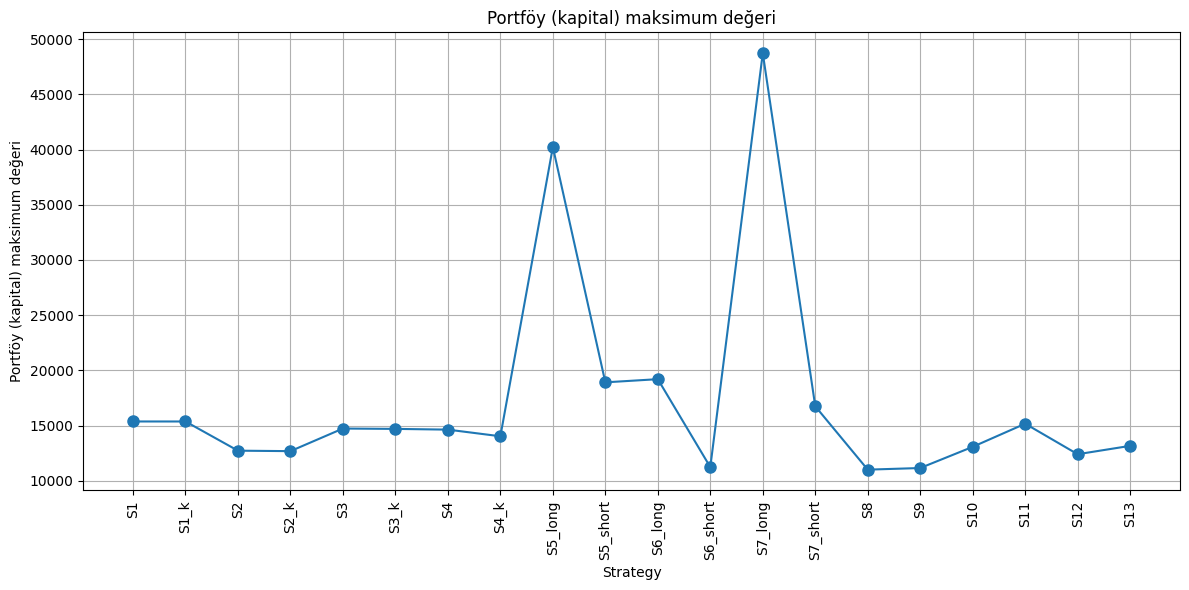

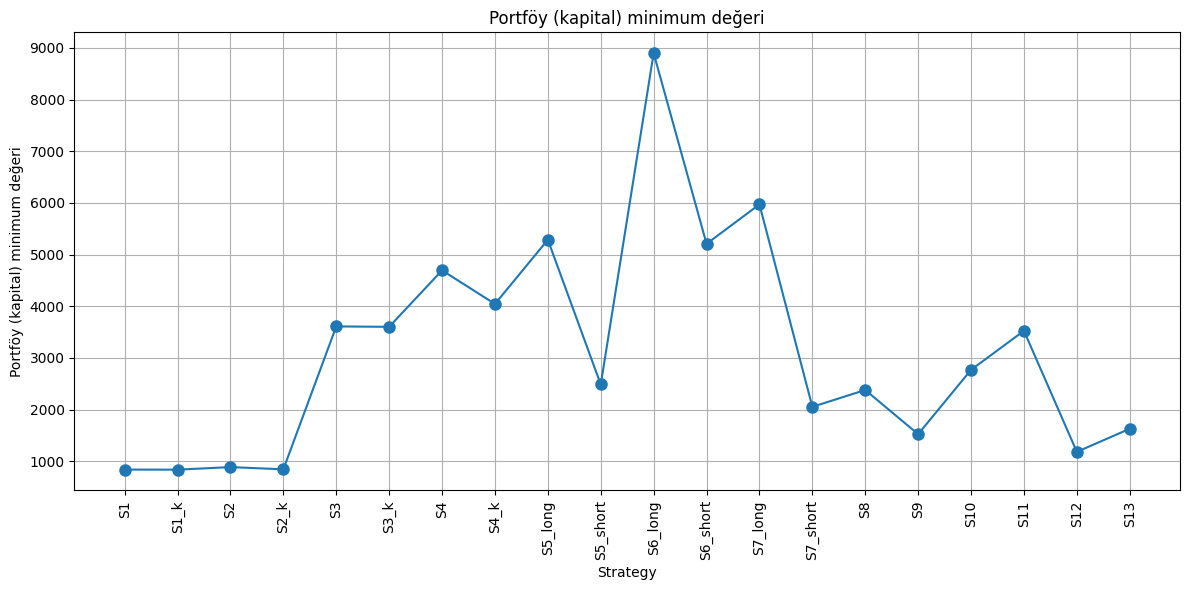

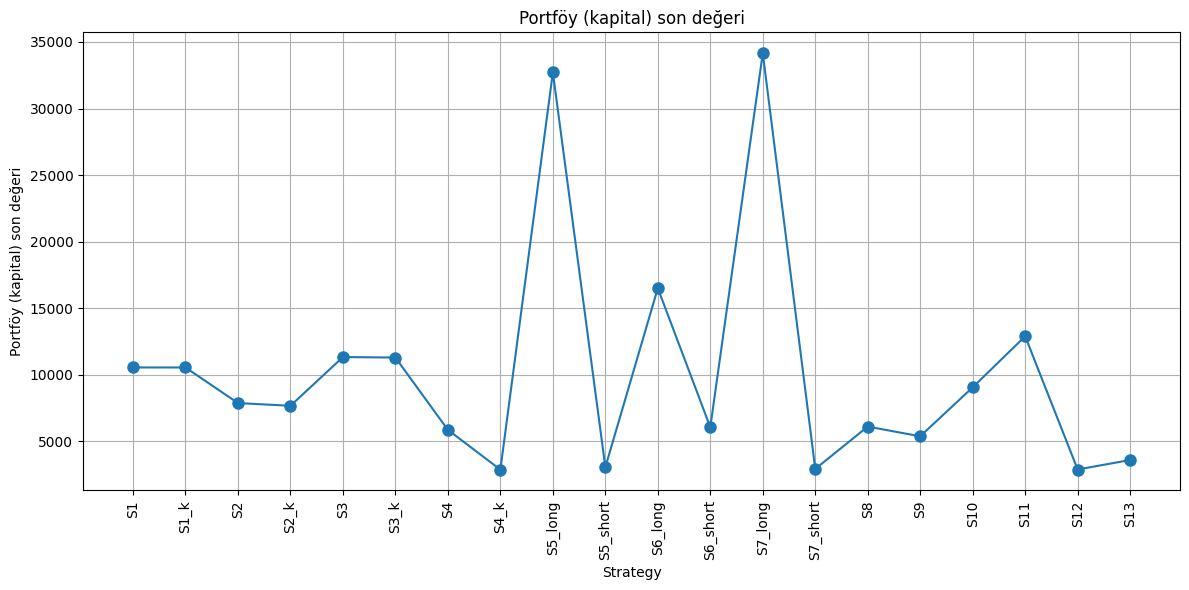

In [680]:
columns_to_plot = summary_of_strategies.columns[0:]  

strategies = ['S1', 'S1_k', 'S2', 'S2_k', 'S3', 'S3_k', 'S4', 'S4_k', 'S5_long', 'S5_short', 'S6_long', 'S6_short', 'S7_long', 'S7_short', 'S8', 'S9', 'S10', 'S11', 'S12','S13']

for column in columns_to_plot:
    plt.figure(figsize=(12, 6))
    plt.plot(strategies, summary_of_strategies[column], marker='o', linestyle='-', markersize=8)
    plt.xlabel('Strategy')
    plt.ylabel(column)
    plt.title(f'{column}')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Strategy 1


#### The Buy and Hold strategy completed with a profit, but I think it was well below even the risk-free interest return for 17 years. Therefore this strategy is not preferable.

# Strategy 2

#### This strategy not only finished with a loss, but also had a large number of trades, so it has an extra disadvantage in the case of commissions.

# Strategy 3

#### We see that the Sell in May and go away strategy ends with a profit, but since this profit is around 11%, it may still be below the return of the risk-free rate in the 17-year term. This strategy is not so useful since there are other strategies that can use the effect of time better.

# Strategy 4

#### Although this strategy sometimes reaches the profit zone, it ends up with a loss and is quite disadvantageous in terms of commission, with an average of 88 trades per year.

# Strategy 5

#### The long case of this strategy is the 2nd strategy that gave the best results after 17 years for the stock I examined. It finished with a profit of over 300% and the trend of the portfolio is up. This, in turn, can reduce the attrition for investor psychology. One of the disadvantages is that we lose some money in the commissioned situation with an average of 68 trades per year, and the short status of this strategy is not an effective choice.

# Strategy 6

#### This strategy also ended with a profit of 65% in the Long case at the end of 17 years, and the minimum portfolio value decreased to around $8000 at the worst during this period. This may also be a reasonable choice for risk-averse investors. In the short situation, it does not have a significant performance.

# Strategy 7

#### This is the strategy that finishes with the best result that I have observed for the Long situation. While it is a seriously successful strategy with a 341% profitability rate and a small number of trades, since the trade interval is long, it is extremely volatile in terms of the value of the portfolio throughout the investment. While it can cause a loss of around 6000 dollars at a time, it has also brought a huge profit of around 16000 dollars. It is a preferable strategy for investors who have a high risk appetite and can control their psychology well.

# Strategy 8

#### RSI strategies have unfortunately not been successful for my stock. While it finished with a loss of around 40%, the best value the portfolio saw throughout the process was around $11000.

# Strategy 9

#### is the other RSI strategy that failed. Finished with close to 50% damage

# Strategy 10

#### This strategy, which remains disadvantageous in the long term with approximately 30 trades per year and commission, has completed 17 years with a loss of around 10%.

# Strategy 11

#### This MA strategy, which ends with a profit rate of close to 30%, receives a commission fee that can not be called less, with an average of 40 trades per year. Since the value of the portfolio decreases to 3000 dollars during this process, it may not be preferred as a long-term sustainable strategy. However, it may be preferable in the short term for hit-and-run traders.

# Strategy 12

#### It is the 2nd worst finishing strategy for my stock in 17 years. Since the best portfolio value he has seen is around $12000, it is not a good option for both short-term and long-term trades, but it can be seriously useful for the short approach.

# Strategy 13

#### This strategy, which ends with a loss of 64%, is not useful in the long term, but shorts with serious profit potential can be opened in the short term.

### In summary, which of these strategies is the "best" will vary depending on the investor's risk appetite, how much time he can or wants to spend on trades per year, how resistant he is to sharp declines, and his tendency to get carried away by sharp rises. Apart from these 13 strategies, general markets I have not yet developed a strategy that will work, but my own opinion is that Strategy 7 is the best strategy in the long case. Since I extend the trading period by accepting to miss certain opportunities in the short term, I pay less commission and my psychology is less affected by volatility.